# Imports

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import datetime
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer

# Descargar DataSet

In [32]:
dataset = pd.read_csv('/home/user/machinelearning/imida/data/AL41_todas_fechas.csv')
dataset.head(3)

,CODEST,FECHA,VVMED,VVMAX,RVIENTO,DVMED,TMIN,TMAX,TMED,TMINABS,...,HSOL,PREC,HORAS0,HORAS7,DEWPT,DPV,ETO_PM_FAO,FECHA_2,AÑO,ESTACION
0,AL41,01/01/1994,NaN,NaN,121.68,NaN,5.9,19.1,12.87,5.9,...,NaN,0.0,0.0,3.0,NaN,NaN,2.928228,1994-01-01,1994,INVIERNO
1,AL41,02/01/1994,NaN,NaN,104.76,NaN,2.9,20.8,11.75,2.9,...,NaN,0.0,0.0,9.0,NaN,NaN,2.928228,1994-01-02,1994,INVIERNO
2,AL41,03/01/1994,NaN,NaN,94.32,NaN,2.8,19.4,10.56,2.8,...,NaN,0.0,0.0,8.0,NaN,NaN,2.928228,1994-01-03,1994,INVIERNO


# Creación DataSets

## DataSet a partir de fecha

Construimos un Dataset únicamente con las medidas a partir del 23/04/2010, que es cuando están funcionando correctamente todos los sensores

### Sacamos la fecha

In [33]:
dataset[dataset['DPV'].isnull()==False].head(1)

,CODEST,FECHA,VVMED,VVMAX,RVIENTO,DVMED,TMIN,TMAX,TMED,TMINABS,...,HSOL,PREC,HORAS0,HORAS7,DEWPT,DPV,ETO_PM_FAO,FECHA_2,AÑO,ESTACION
5956,AL41,23/04/2010,1.51,8.23,130.06,145.15,9.74,21.44,16.07,9.25,...,11.0,0.1,0.0,0.0,12.41,0.51,3.010548,2010-04-23,2010,PRIMAVERA


### Cogemos el Dataset a partir de esa fecha

In [34]:
dataset_reduccion_filas = dataset[dataset['FECHA_2'] >= '2010-04-23']

### Reseteamos el índice

In [35]:
dataset_reduccion_filas.reset_index(drop=True, inplace=True)
dataset_reduccion_filas.head()

,CODEST,FECHA,VVMED,VVMAX,RVIENTO,DVMED,TMIN,TMAX,TMED,TMINABS,...,HSOL,PREC,HORAS0,HORAS7,DEWPT,DPV,ETO_PM_FAO,FECHA_2,AÑO,ESTACION
0,AL41,23/04/2010,1.51,8.23,130.06,145.15,9.74,21.44,16.07,9.250,...,11.0,0.1,0.0,0.0,12.41,0.51,3.010548,2010-04-23,2010,PRIMAVERA
1,AL41,24/04/2010,1.64,8.13,141.92,176.62,10.79,25.06,17.78,10.330,...,12.0,0.0,0.0,0.0,11.81,0.74,4.496808,2010-04-24,2010,PRIMAVERA
2,AL41,25/04/2010,1.54,8.43,132.96,94.79,11.79,24.97,17.31,11.330,...,10.0,0.0,0.0,0.0,12.08,0.64,3.886669,2010-04-25,2010,PRIMAVERA
3,AL41,26/04/2010,1.75,9.11,151.19,130.98,8.98,25.68,17.27,8.420,...,12.0,0.0,0.0,0.0,8.83,0.96,5.082196,2010-04-26,2010,PRIMAVERA
4,AL41,27/04/2010,1.92,10.19,165.98,174.00,8.59,28.48,18.05,7.913,...,12.0,0.0,0.0,0.0,8.47,1.14,5.563509,2010-04-27,2010,PRIMAVERA


### Nulos

#### Comprobamos que en efecto hay pocos nulos

In [36]:
print(dataset_reduccion_filas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3946 entries, 0 to 3945
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CODEST      3946 non-null   object 
 1   FECHA       3946 non-null   object 
 2   VVMED       3936 non-null   float64
 3   VVMAX       3936 non-null   float64
 4   RVIENTO     3936 non-null   float64
 5   DVMED       3936 non-null   float64
 6   TMIN        3936 non-null   float64
 7   TMAX        3936 non-null   float64
 8   TMED        3936 non-null   float64
 9   TMINABS     3936 non-null   float64
 10  TMAXABS     3936 non-null   float64
 11  HRMIN       3936 non-null   float64
 12  HRMAX       3936 non-null   float64
 13  HRMED       3936 non-null   float64
 14  HRMINABS    3936 non-null   float64
 15  HRMAXABS    3936 non-null   float64
 16  RADMED      3936 non-null   float64
 17  RADMAX      3936 non-null   float64
 18  HSOL        3936 non-null   float64
 19  PREC        3936 non-null  

#### Encontramos los nulos que nos quedan

In [37]:
filas_null = dataset_reduccion_filas[dataset_reduccion_filas['HRMIN'].isnull() == True].head(10)
filas_null

,CODEST,FECHA,VVMED,VVMAX,RVIENTO,DVMED,TMIN,TMAX,TMED,TMINABS,...,HSOL,PREC,HORAS0,HORAS7,DEWPT,DPV,ETO_PM_FAO,FECHA_2,AÑO,ESTACION
164,AL41,04/10/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-10-04,2010,OTOÑO
371,AL41,29/04/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-04-29,2011,PRIMAVERA
372,AL41,30/04/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-04-30,2011,PRIMAVERA
373,AL41,01/05/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-05-01,2011,PRIMAVERA
3512,AL41,04/12/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-04,2019,OTOÑO
3513,AL41,05/12/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-05,2019,OTOÑO
3514,AL41,06/12/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-06,2019,OTOÑO
3515,AL41,07/12/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-07,2019,OTOÑO
3516,AL41,08/12/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-08,2019,OTOÑO
3517,AL41,09/12/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-09,2019,OTOÑO


##### Sacamos los índices en los que se encuentran esos nulos

In [38]:
filas_null.index

Index([164, 371, 372, 373, 3512, 3513, 3514, 3515, 3516, 3517], dtype='int64')

#### Porcentaje de nulos

In [39]:
print(dataset_reduccion_filas.count()/3946 * 100)

CODEST        100.000000
FECHA         100.000000
VVMED          99.746579
VVMAX          99.746579
RVIENTO        99.746579
DVMED          99.746579
TMIN           99.746579
TMAX           99.746579
TMED           99.746579
TMINABS        99.746579
TMAXABS        99.746579
HRMIN          99.746579
HRMAX          99.746579
HRMED          99.746579
HRMINABS       99.746579
HRMAXABS       99.746579
RADMED         99.746579
RADMAX         99.746579
HSOL           99.746579
PREC           99.746579
HORAS0         99.746579
HORAS7         99.746579
DEWPT          99.746579
DPV            99.746579
ETO_PM_FAO     99.746579
FECHA_2       100.000000
AÑO           100.000000
ESTACION      100.000000
dtype: float64


### Guardar el DataSet

In [40]:
dataset_reduccion_filas.to_csv('/home/user/machinelearning/imida/data/AL41_reduccion_filas.csv', index=False)

## DataSet a partir de variables

Creamos un dataset solo con los variables que tienen datos consistentes desde el inicio

### Nos creamos el dataset con las variables que nos interesan

In [41]:
dataset_reduccion_columnas = dataset[['CODEST', 'FECHA', 'RVIENTO', 'TMIN', 'TMAX', 'TMED', 'TMINABS', 'TMAXABS', 'HRMIN', 'HRMAX', 'HRMED', 'HRMINABS', 'HRMAXABS', 'PREC', 'HORAS0', 'HORAS7', 'ETO_PM_FAO','FECHA_2', 'AÑO', 'ESTACION']]
dataset_reduccion_columnas.head()

,CODEST,FECHA,RVIENTO,TMIN,TMAX,TMED,TMINABS,TMAXABS,HRMIN,HRMAX,HRMED,HRMINABS,HRMAXABS,PREC,HORAS0,HORAS7,ETO_PM_FAO,FECHA_2,AÑO,ESTACION
0,AL41,01/01/1994,121.68,5.9,19.1,12.87,5.9,19.1,39.3,86.7,63.48,39.3,86.7,0.0,0.0,3.0,2.928228,1994-01-01,1994,INVIERNO
1,AL41,02/01/1994,104.76,2.9,20.8,11.75,2.9,20.8,38.5,84.5,62.61,38.5,84.5,0.0,0.0,9.0,2.928228,1994-01-02,1994,INVIERNO
2,AL41,03/01/1994,94.32,2.8,19.4,10.56,2.8,19.4,43.2,92.1,71.77,43.2,92.1,0.0,0.0,8.0,2.928228,1994-01-03,1994,INVIERNO
3,AL41,04/01/1994,153.36,8.3,15.6,12.20,8.3,15.6,38.4,78.6,60.12,38.4,78.6,0.0,0.0,0.0,2.928228,1994-01-04,1994,INVIERNO
4,AL41,05/01/1994,151.92,-0.4,16.1,8.55,-0.4,16.1,35.5,88.8,63.18,35.5,88.8,0.0,3.0,8.0,2.928228,1994-01-05,1994,INVIERNO


### Comprobamos que en efecto hay pocos nulos

In [42]:
print(dataset_reduccion_columnas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9902 entries, 0 to 9901
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CODEST      9902 non-null   object 
 1   FECHA       9902 non-null   object 
 2   RVIENTO     9872 non-null   float64
 3   TMIN        9867 non-null   float64
 4   TMAX        9867 non-null   float64
 5   TMED        9867 non-null   float64
 6   TMINABS     9867 non-null   float64
 7   TMAXABS     9867 non-null   float64
 8   HRMIN       9867 non-null   float64
 9   HRMAX       9867 non-null   float64
 10  HRMED       9867 non-null   float64
 11  HRMINABS    9867 non-null   float64
 12  HRMAXABS    9867 non-null   float64
 13  PREC        9867 non-null   float64
 14  HORAS0      9867 non-null   float64
 15  HORAS7      9867 non-null   float64
 16  ETO_PM_FAO  9868 non-null   float64
 17  FECHA_2     9902 non-null   object 
 18  AÑO         9902 non-null   int64  
 19  ESTACION    9902 non-null  

### Guardamos el dataset

In [43]:
dataset_reduccion_columnas.to_csv('/home/user/machinelearning/imida/data/AL41_reduccion_columnas.csv', index=False)

# Imputación

## RandomForestRegressor

Imputamos los datos que nos faltan en el dataset reducido por filas mediantes RandomForestRegressor aplicado a cada columna

In [44]:
datos_imputados_RFR = dataset_reduccion_filas.copy()
for variable in dataset_reduccion_filas.columns:
    if variable != 'FECHA_2' and variable != 'FECHA' and variable != 'CODEST' and variable != 'AÑO' and variable != 'ESTACION':
        imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, random_state=42), 
                           max_iter=10, random_state=42)
        after_imputation = imputer.fit_transform(pd.DataFrame(dataset_reduccion_filas[variable]))
        after_imputation = pd.DataFrame(after_imputation)
        datos_imputados_RFR.loc[:,variable] = after_imputation[0].values

### Vistazo pre-imputación

In [45]:
dataset_reduccion_filas.loc[filas_null.index.values,:]

,CODEST,FECHA,VVMED,VVMAX,RVIENTO,DVMED,TMIN,TMAX,TMED,TMINABS,...,HSOL,PREC,HORAS0,HORAS7,DEWPT,DPV,ETO_PM_FAO,FECHA_2,AÑO,ESTACION
164,AL41,04/10/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-10-04,2010,OTOÑO
371,AL41,29/04/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-04-29,2011,PRIMAVERA
372,AL41,30/04/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-04-30,2011,PRIMAVERA
373,AL41,01/05/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-05-01,2011,PRIMAVERA
3512,AL41,04/12/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-04,2019,OTOÑO
3513,AL41,05/12/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-05,2019,OTOÑO
3514,AL41,06/12/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-06,2019,OTOÑO
3515,AL41,07/12/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-07,2019,OTOÑO
3516,AL41,08/12/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-08,2019,OTOÑO
3517,AL41,09/12/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-09,2019,OTOÑO


### Vistazo post-imputación

Vemos que no da muy buenos resultados, ya que en cada columna pone el mismo valor para los datos faltantes

In [46]:
datos_imputados.loc[filas_null.index.values,:]

,CODEST,FECHA,VVMED,VVMAX,RVIENTO,DVMED,TMIN,TMAX,TMED,TMINABS,...,HSOL,PREC,HORAS0,HORAS7,DEWPT,DPV,ETO_PM_FAO,FECHA_2,AÑO,ESTACION
164,AL41,04/10/2010,2.148554,9.161629,185.627221,150.837693,10.725873,23.900087,17.250783,9.848494,...,9.536331,0.716059,0.154217,2.451728,8.137952,1.01765,4.066978,2010-10-04,2010,OTOÑO
371,AL41,29/04/2011,2.148554,9.161629,185.627221,150.837693,10.725873,23.900087,17.250783,9.848494,...,9.536331,0.716059,0.154217,2.451728,8.137952,1.01765,4.066978,2011-04-29,2011,PRIMAVERA
372,AL41,30/04/2011,2.148554,9.161629,185.627221,150.837693,10.725873,23.900087,17.250783,9.848494,...,9.536331,0.716059,0.154217,2.451728,8.137952,1.01765,4.066978,2011-04-30,2011,PRIMAVERA
373,AL41,01/05/2011,2.148554,9.161629,185.627221,150.837693,10.725873,23.900087,17.250783,9.848494,...,9.536331,0.716059,0.154217,2.451728,8.137952,1.01765,4.066978,2011-05-01,2011,PRIMAVERA
3512,AL41,04/12/2019,2.148554,9.161629,185.627221,150.837693,10.725873,23.900087,17.250783,9.848494,...,9.536331,0.716059,0.154217,2.451728,8.137952,1.01765,4.066978,2019-12-04,2019,OTOÑO
3513,AL41,05/12/2019,2.148554,9.161629,185.627221,150.837693,10.725873,23.900087,17.250783,9.848494,...,9.536331,0.716059,0.154217,2.451728,8.137952,1.01765,4.066978,2019-12-05,2019,OTOÑO
3514,AL41,06/12/2019,2.148554,9.161629,185.627221,150.837693,10.725873,23.900087,17.250783,9.848494,...,9.536331,0.716059,0.154217,2.451728,8.137952,1.01765,4.066978,2019-12-06,2019,OTOÑO
3515,AL41,07/12/2019,2.148554,9.161629,185.627221,150.837693,10.725873,23.900087,17.250783,9.848494,...,9.536331,0.716059,0.154217,2.451728,8.137952,1.01765,4.066978,2019-12-07,2019,OTOÑO
3516,AL41,08/12/2019,2.148554,9.161629,185.627221,150.837693,10.725873,23.900087,17.250783,9.848494,...,9.536331,0.716059,0.154217,2.451728,8.137952,1.01765,4.066978,2019-12-08,2019,OTOÑO
3517,AL41,09/12/2019,2.148554,9.161629,185.627221,150.837693,10.725873,23.900087,17.250783,9.848494,...,9.536331,0.716059,0.154217,2.451728,8.137952,1.01765,4.066978,2019-12-09,2019,OTOÑO


## KNNImputer por columnas

In [47]:
datos_imputados_KNN = dataset_reduccion_filas.copy()
for variable in dataset_reduccion_filas.columns:
    if variable != 'FECHA_2' and variable != 'FECHA' and variable != 'CODEST' and variable != 'AÑO' and variable != 'ESTACION':
        imputer = KNNImputer(n_neighbors=500, weights='distance')
        after_imputation = imputer.fit_transform(pd.DataFrame(dataset_reduccion_filas[variable]))
        after_imputation = pd.DataFrame(after_imputation)
        datos_imputados_KNN.loc[:,variable] = after_imputation[0].values

## KNNImputer indexando por fecha

Parece dar resultados bastante mejores, así que nos quedaremos con esta aproximación. De aquí sacamos que puede ser buena idea indexar por filas

### Crear dataset indexado por fecha

In [48]:
datos_indexados_fecha = dataset_reduccion_filas.set_index('FECHA')

### Sacar índices nulos

In [49]:
filas_null_fechas = datos_indexados_fecha[datos_indexados_fecha['HRMIN'].isnull() == True]
filas_null_fechas.index

Index(['04/10/2010', '29/04/2011', '30/04/2011', '01/05/2011', '04/12/2019',
       '05/12/2019', '06/12/2019', '07/12/2019', '08/12/2019', '09/12/2019'],
      dtype='object', name='FECHA')

### Aplicar KNN

In [50]:
columna_imputables = datos_indexados_fecha.select_dtypes(include=['float64', 'int64']).columns
imputer = KNNImputer(n_neighbors=500, weights='distance')
datos_indexados_fecha[columna_imputables] = imputer.fit_transform(datos_indexados_fecha[columna_imputables])

### Comprobar resultados

In [51]:
datos_indexados_fecha.loc[filas_null_fechas.index,:]

,CODEST,VVMED,VVMAX,RVIENTO,DVMED,TMIN,TMAX,TMED,TMINABS,TMAXABS,...,HSOL,PREC,HORAS0,HORAS7,DEWPT,DPV,ETO_PM_FAO,FECHA_2,AÑO,ESTACION
FECHA,,,,,,,,,,,,,,,,,,,,,
04/10/2010,AL41,1.952208,9.009623,168.662987,149.931104,12.143922,25.130000,18.619286,11.451390,25.802338,...,9.818182,1.155844,0.045455,1.811688,10.572338,1.010584,4.292419,2010-10-04,2010.0,OTOÑO
29/04/2011,AL41,2.232864,9.069045,192.799364,133.301818,10.972586,23.605891,17.214955,10.183805,24.249377,...,9.490909,0.392273,0.136364,2.204545,9.423227,0.915318,3.926978,2011-04-29,2011.0,PRIMAVERA
30/04/2011,AL41,2.232864,9.069045,192.799364,133.301818,10.972586,23.605891,17.214955,10.183805,24.249377,...,9.490909,0.392273,0.136364,2.204545,9.423227,0.915318,3.926978,2011-04-30,2011.0,PRIMAVERA
01/05/2011,AL41,2.232864,9.069045,192.799364,133.301818,10.972586,23.605891,17.214955,10.183805,24.249377,...,9.490909,0.392273,0.136364,2.204545,9.423227,0.915318,3.926978,2011-05-01,2011.0,PRIMAVERA
04/12/2019,AL41,1.983725,8.876235,171.430196,149.542353,10.543382,24.479412,17.417108,9.537314,25.207255,...,9.789216,0.677451,0.303922,2.838235,7.853873,1.072206,4.137510,2019-12-04,2019.0,OTOÑO
05/12/2019,AL41,1.983725,8.876235,171.430196,149.542353,10.543382,24.479412,17.417108,9.537314,25.207255,...,9.789216,0.677451,0.303922,2.838235,7.853873,1.072206,4.137510,2019-12-05,2019.0,OTOÑO
06/12/2019,AL41,1.983725,8.876235,171.430196,149.542353,10.543382,24.479412,17.417108,9.537314,25.207255,...,9.789216,0.677451,0.303922,2.838235,7.853873,1.072206,4.137510,2019-12-06,2019.0,OTOÑO
07/12/2019,AL41,1.983725,8.876235,171.430196,149.542353,10.543382,24.479412,17.417108,9.537314,25.207255,...,9.789216,0.677451,0.303922,2.838235,7.853873,1.072206,4.137510,2019-12-07,2019.0,OTOÑO
08/12/2019,AL41,2.018293,8.977785,174.415122,150.286049,10.609707,24.678634,17.563902,9.599624,25.410146,...,9.819512,0.638537,0.287805,2.775610,7.802878,1.099024,4.214349,2019-12-08,2019.0,OTOÑO


### Guardar dataset

In [60]:
datos_indexados_fecha.to_csv('/home/user/machinelearning/imida/data/AL41_valores_imputados.csv')

# Visualización

## Datos faltantes Diciembre

In [52]:
data_diciembre_2019 = dataset_reduccion_filas[dataset_reduccion_filas['FECHA_2'] >= '2019-12-01']
data_diciembre_2019 = data_diciembre_2019[data_diciembre_2019['FECHA_2'] <= '2019-12-31']

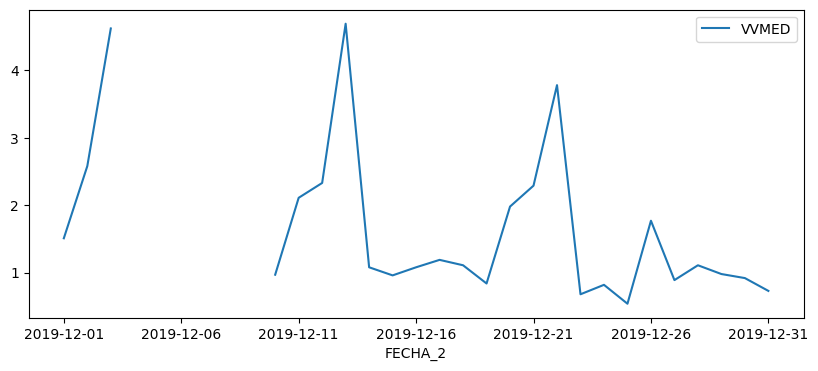

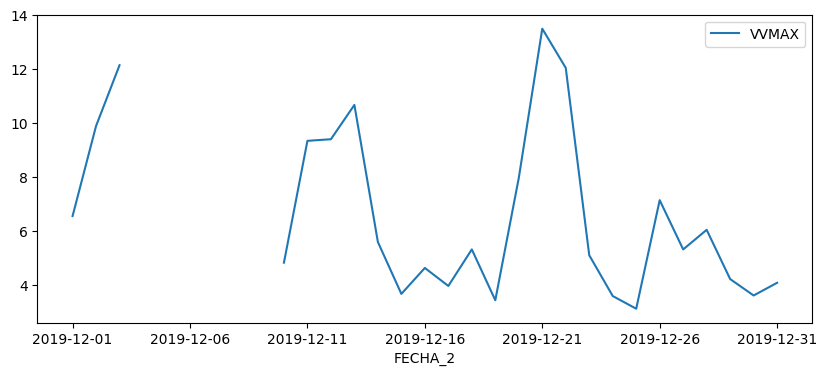

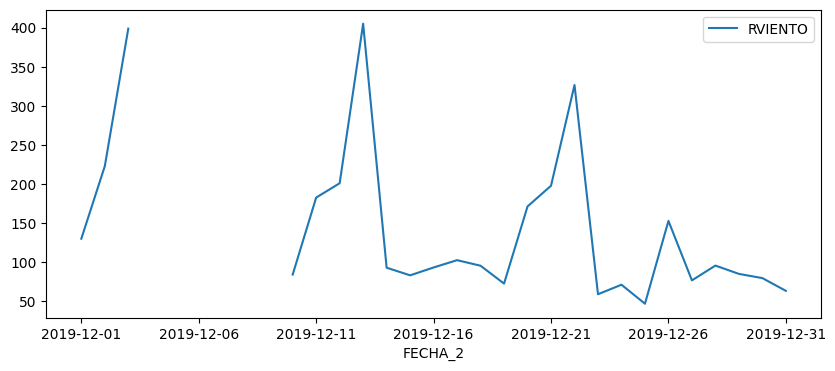

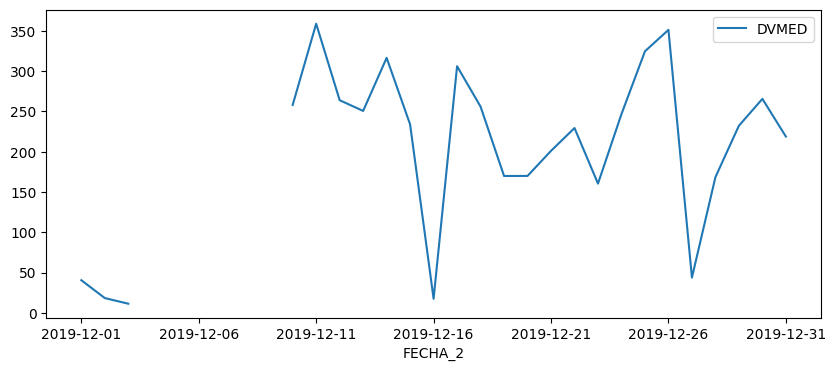

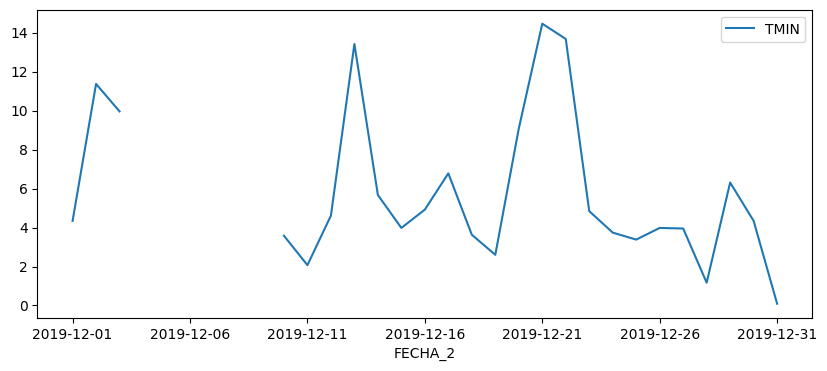

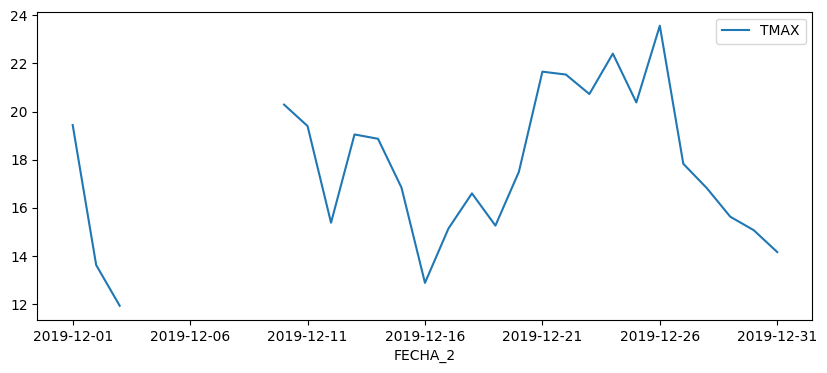

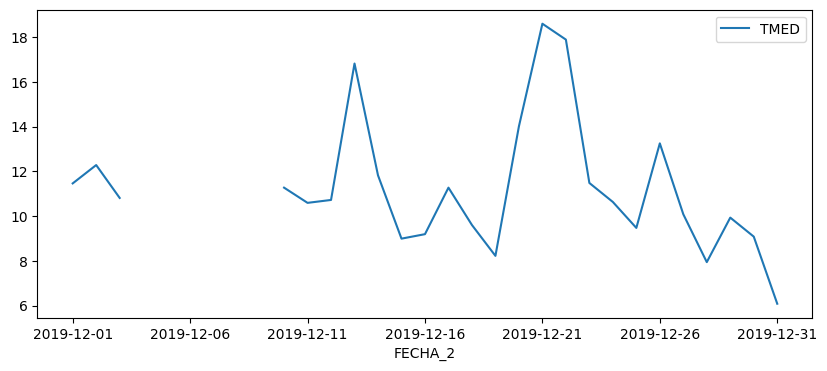

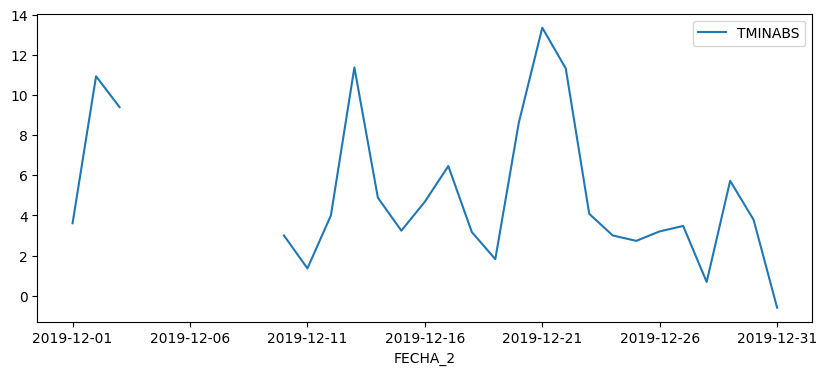

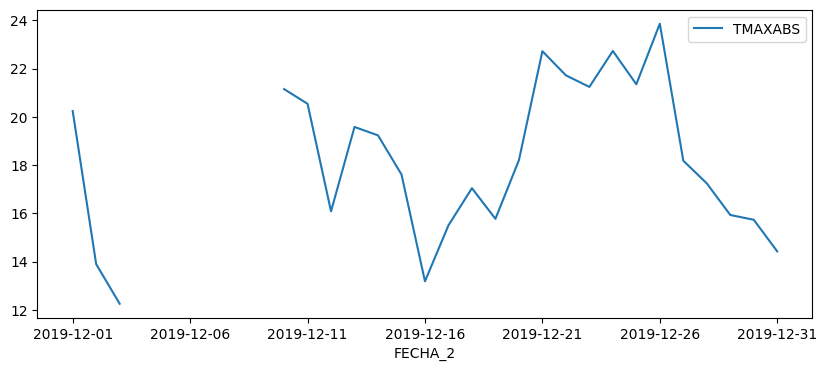

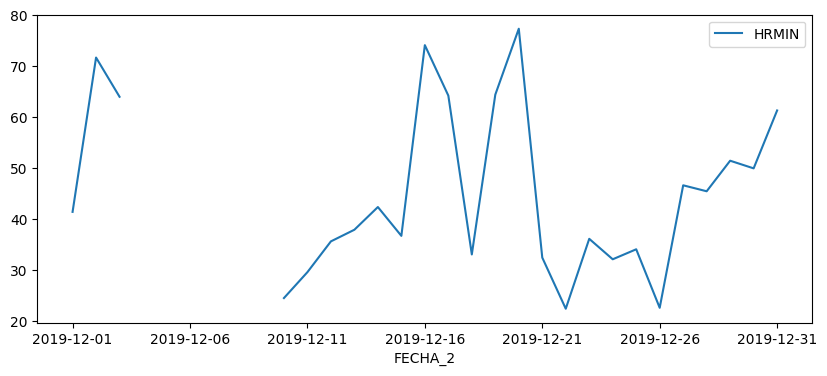

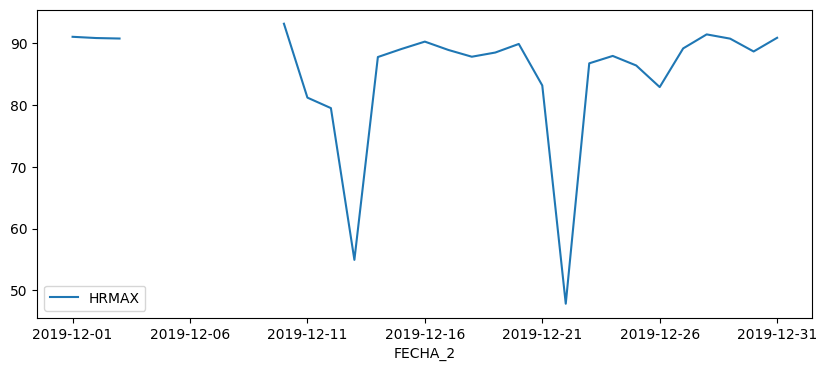

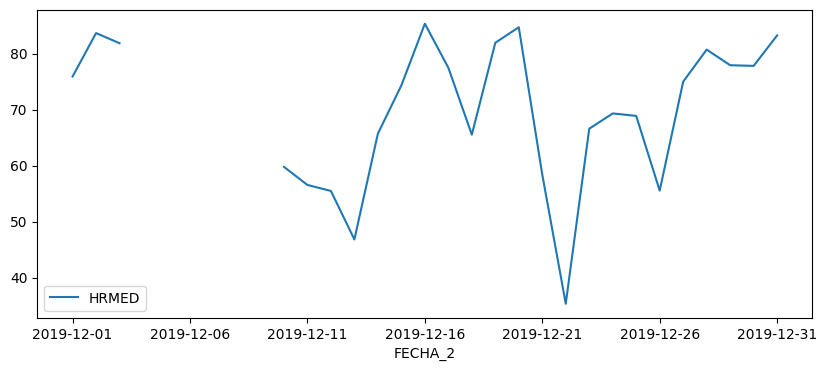

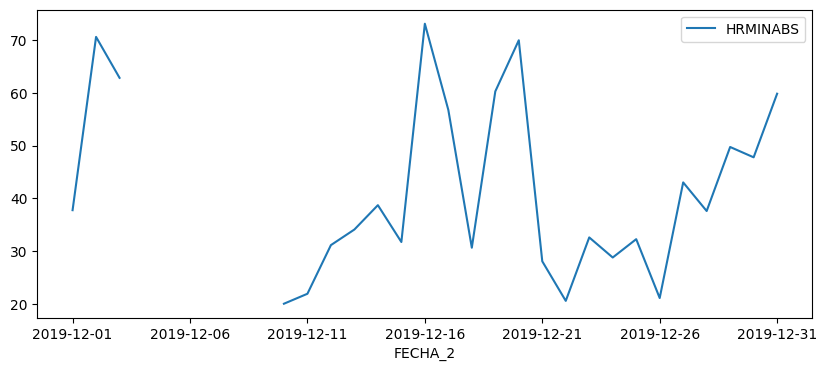

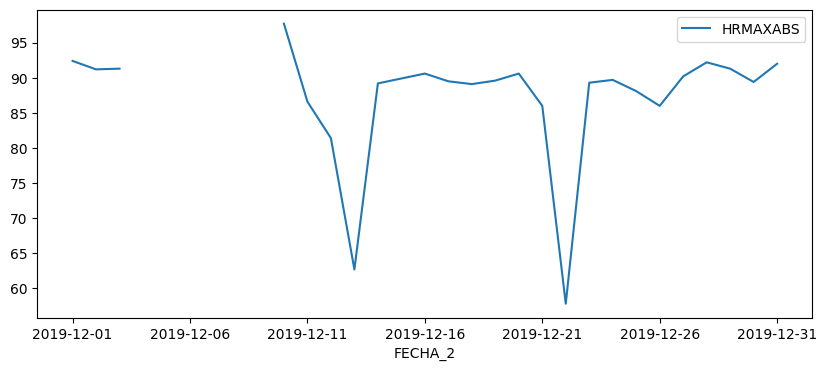

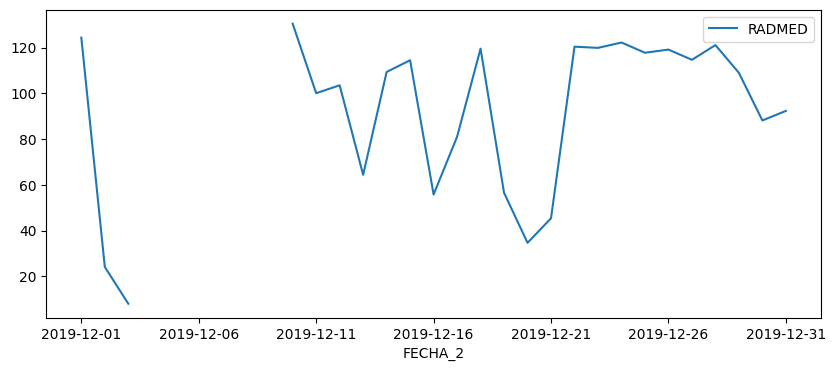

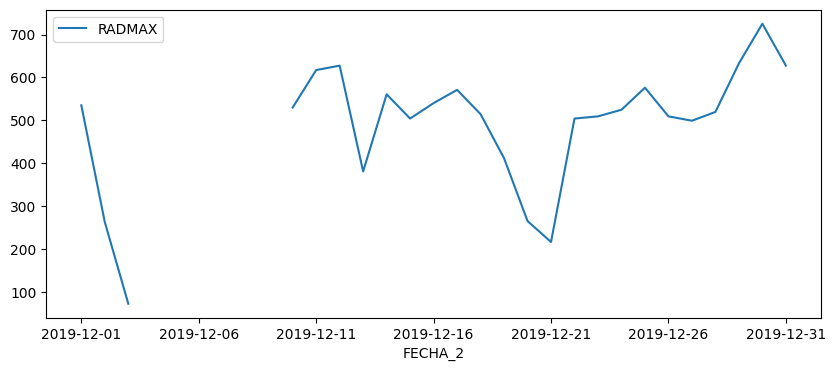

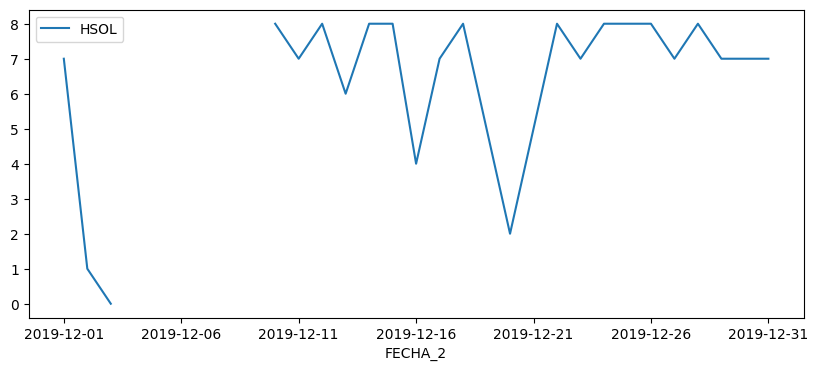

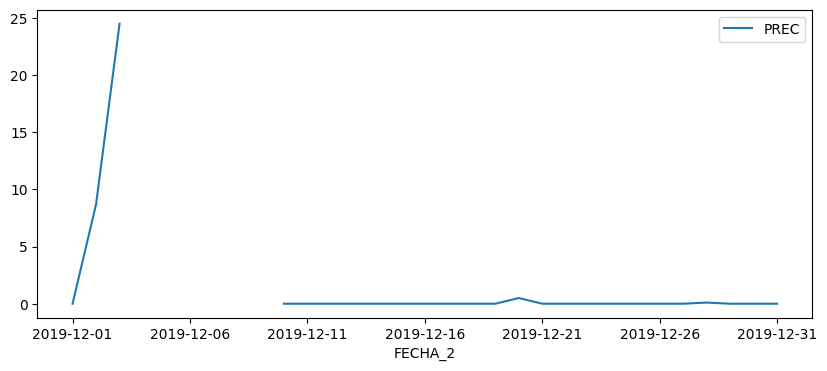

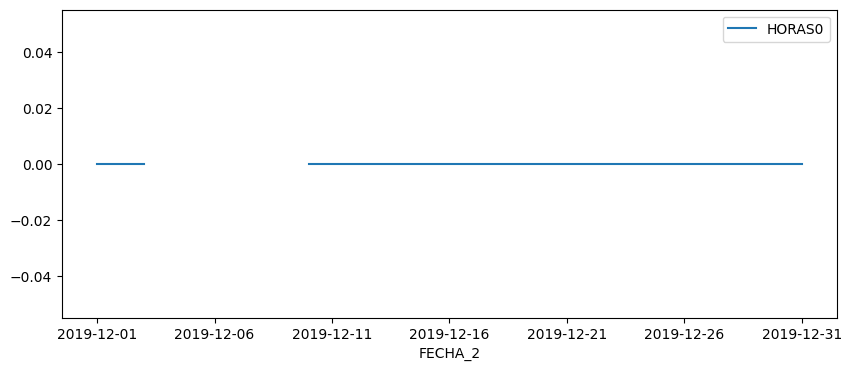

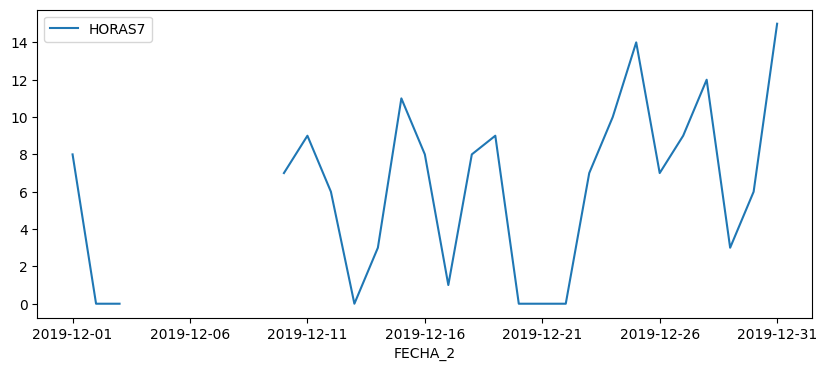

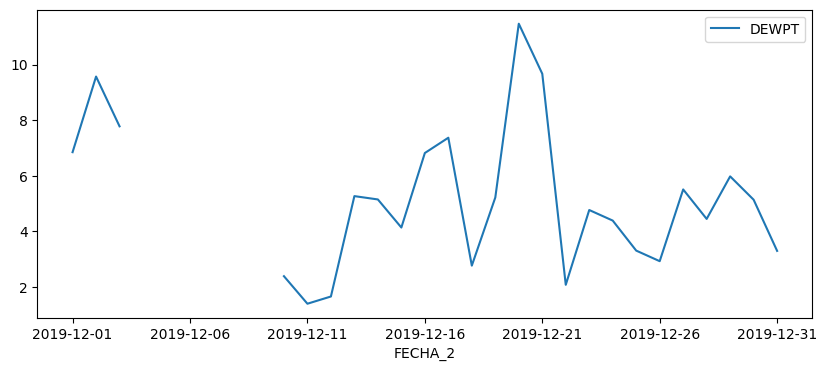

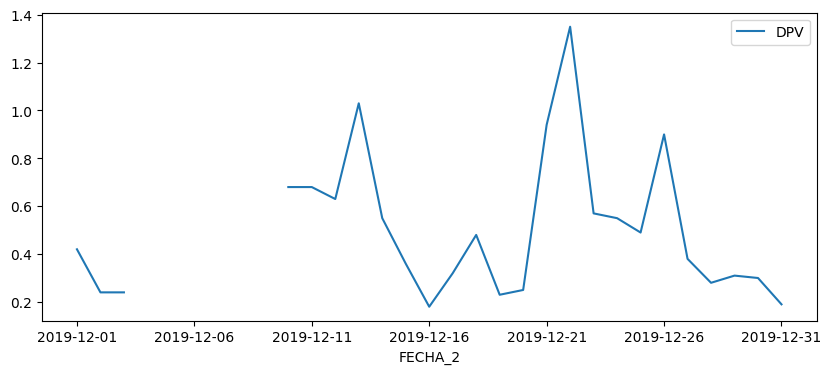

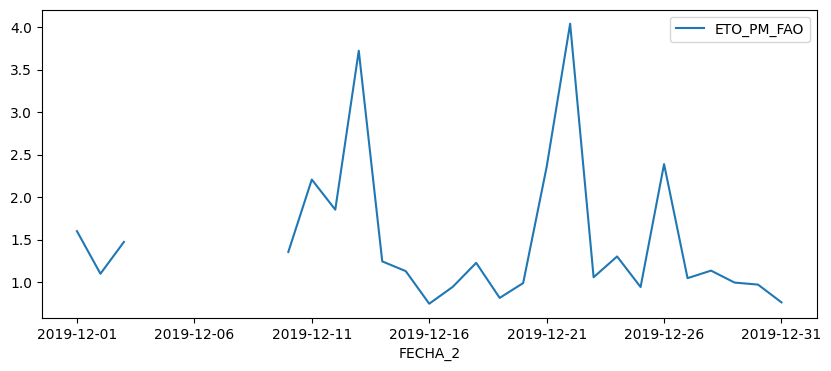

In [53]:
for variable in data_diciembre_2019.columns:
    if variable != 'FECHA_2' and variable != 'FECHA' and variable != 'CODEST' and variable != 'AÑO' and variable != 'ESTACION':
        data_diciembre_2019.plot(x='FECHA_2', y=variable, figsize=(10,4))
        plt.show()

## Datos imputados RandomForestRegresor Diciembre

In [54]:
data_diciembre_2019 = datos_imputados_RFR[datos_imputados_RFR['FECHA_2'] >= '2019-12-01']
data_diciembre_2019 = data_diciembre_2019[data_diciembre_2019['FECHA_2'] <= '2019-12-31']

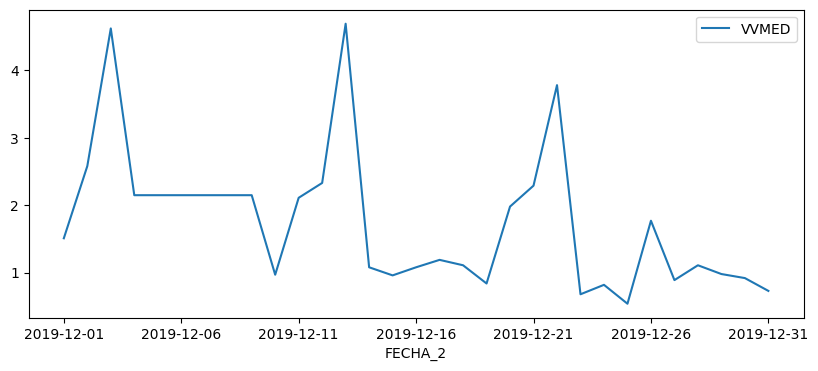

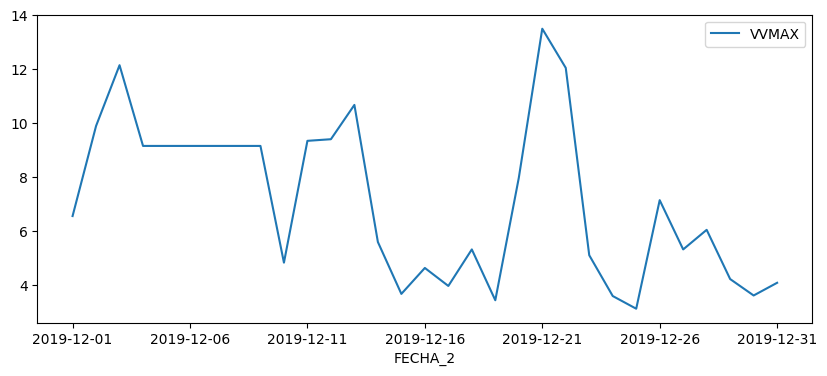

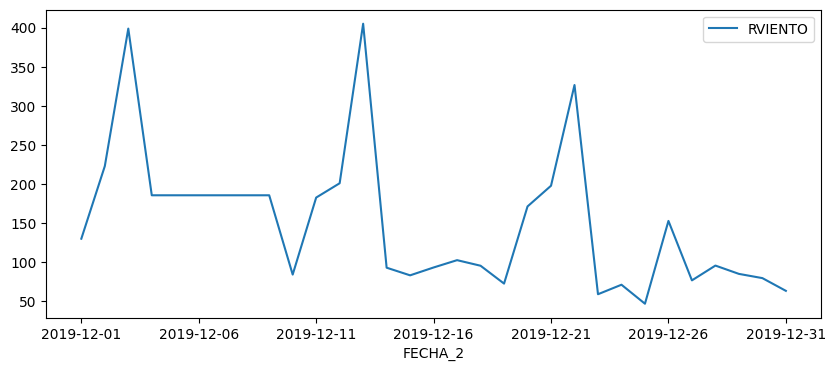

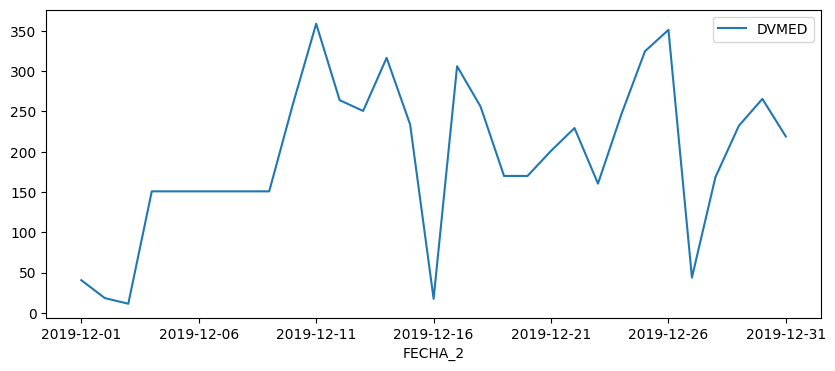

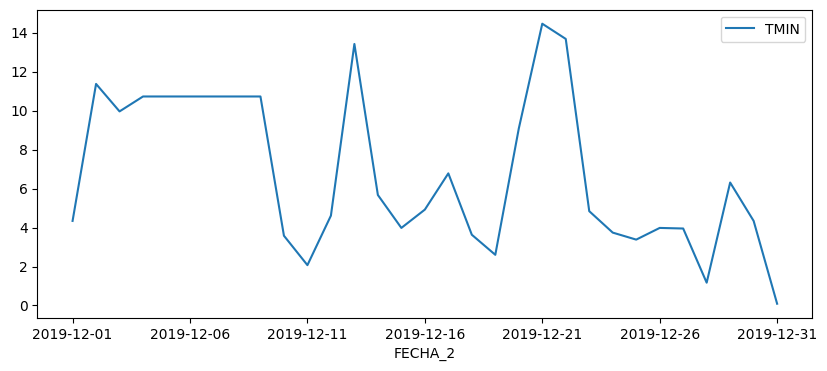

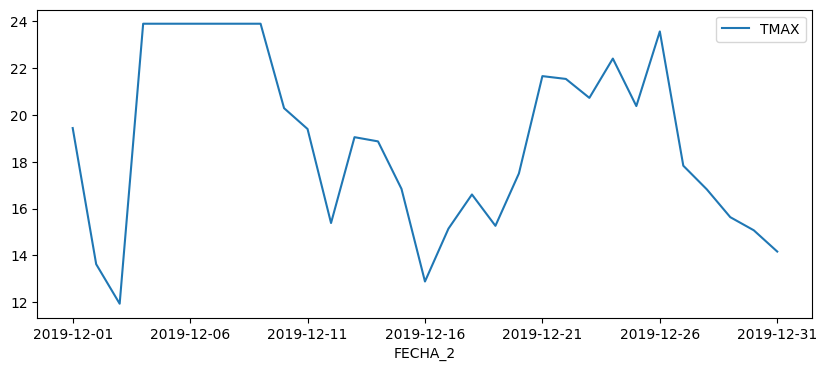

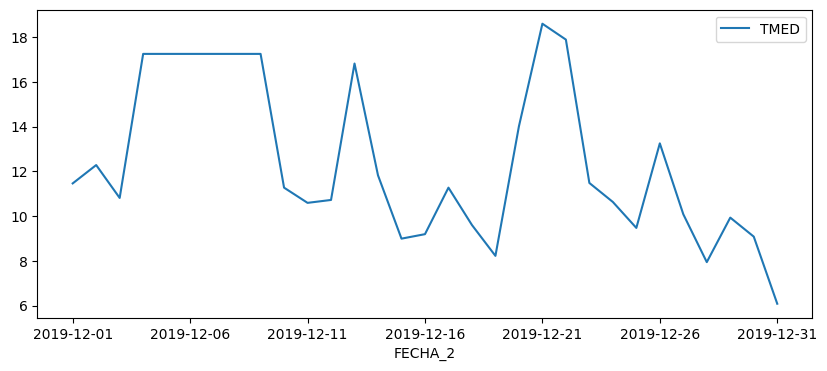

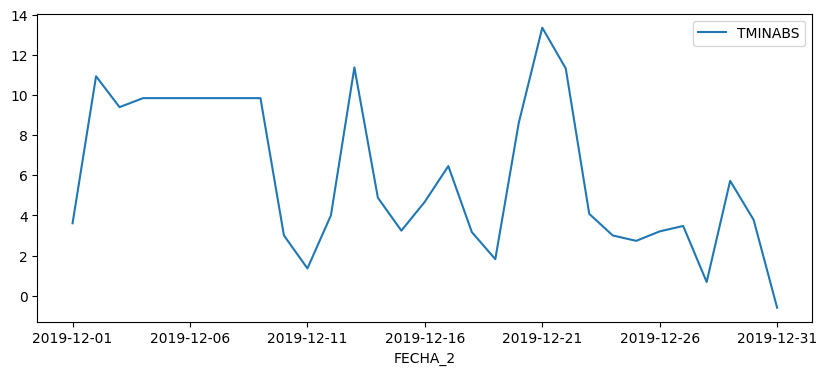

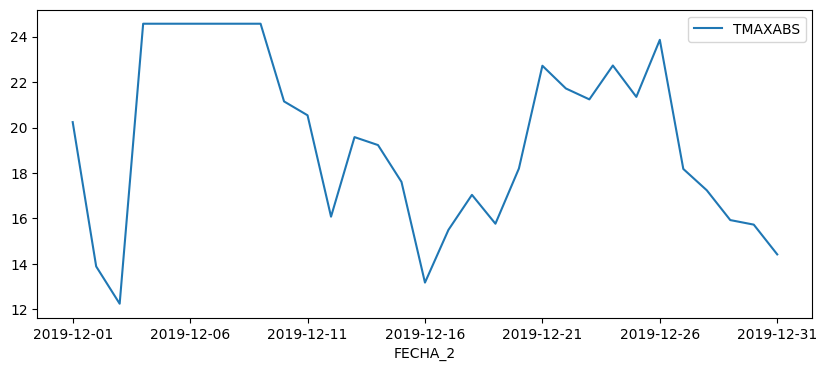

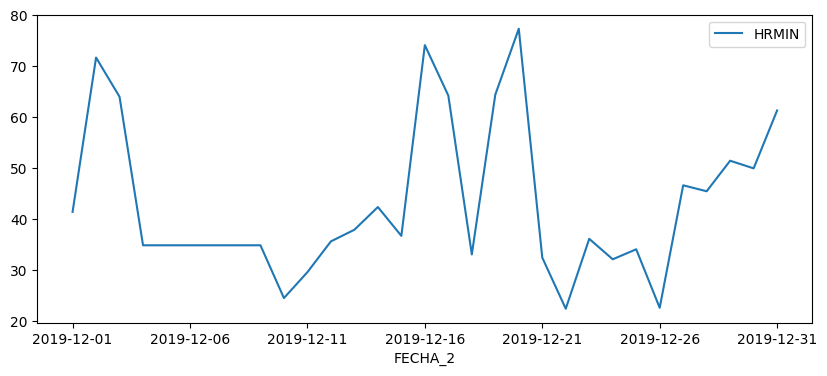

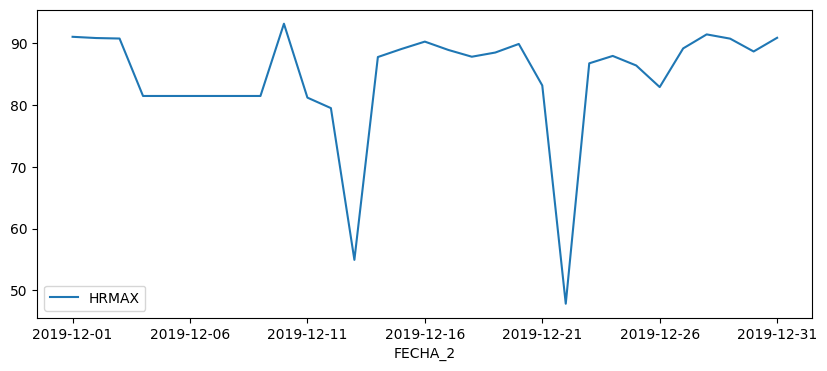

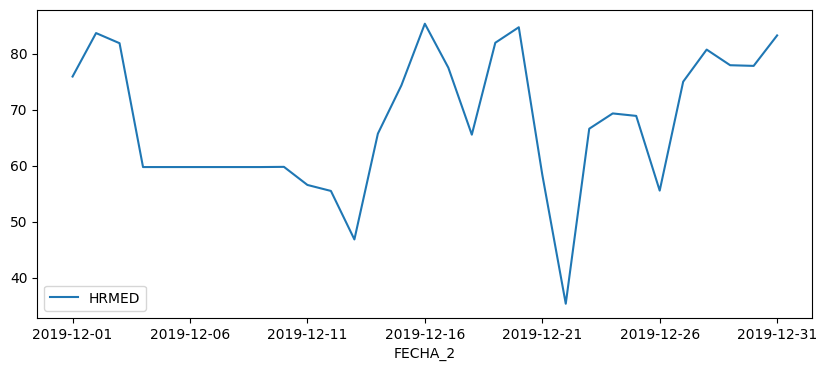

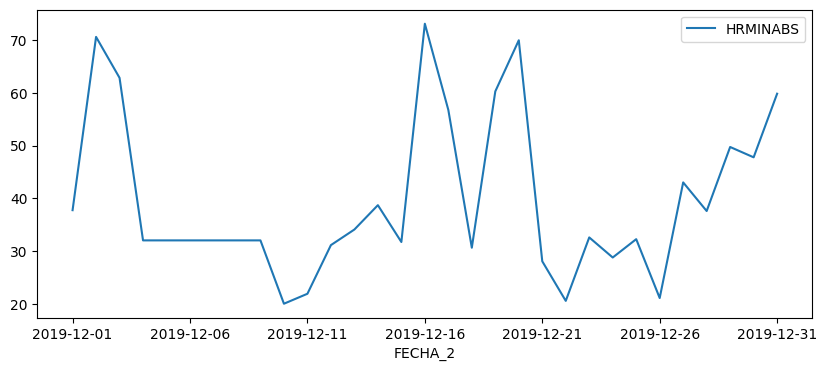

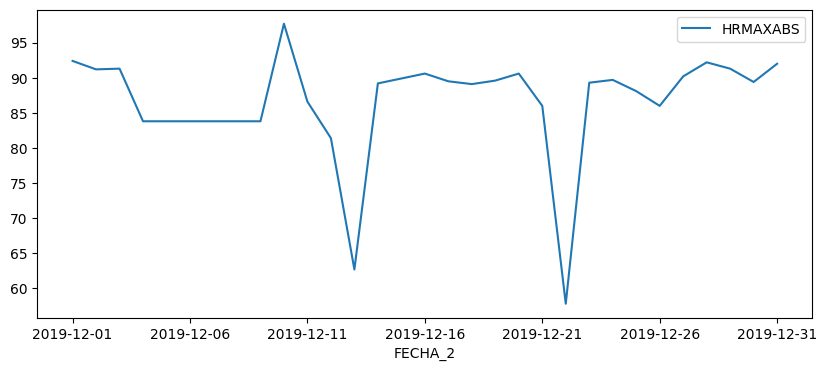

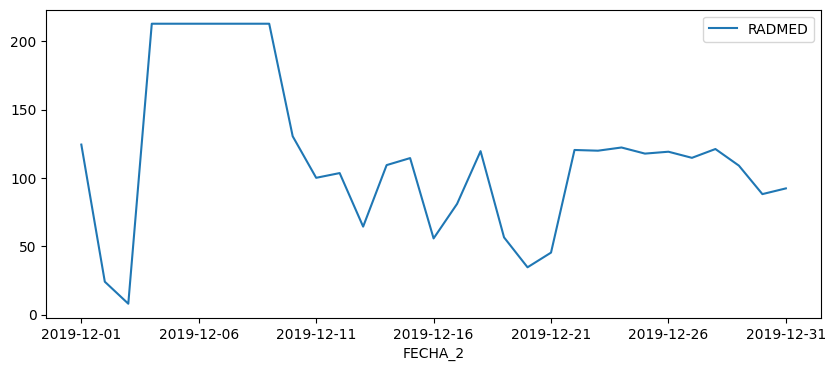

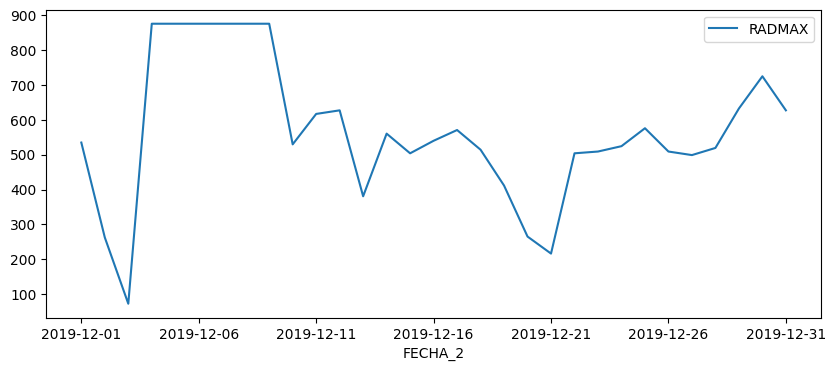

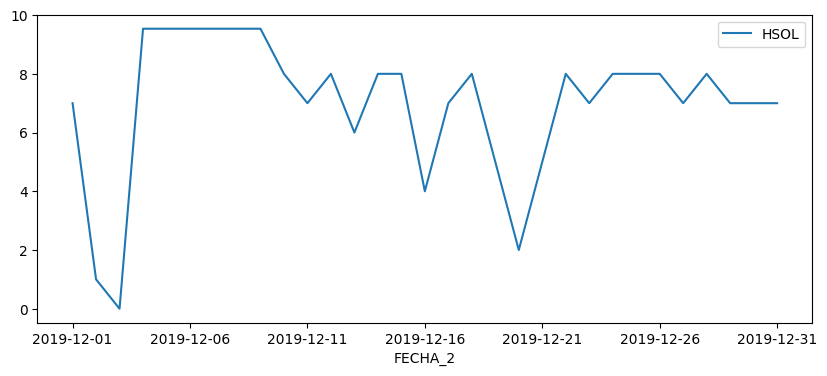

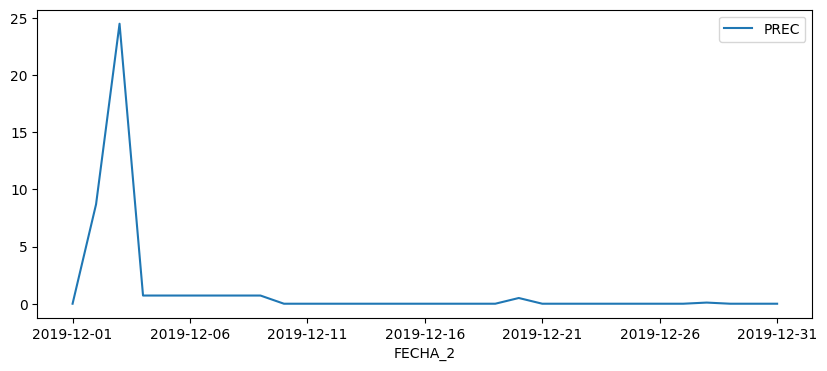

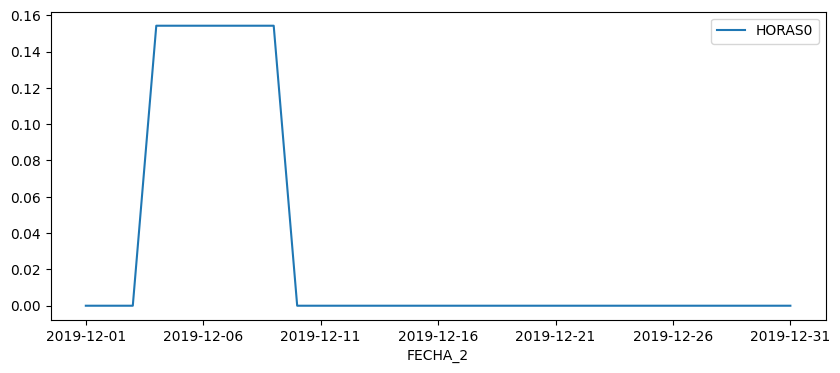

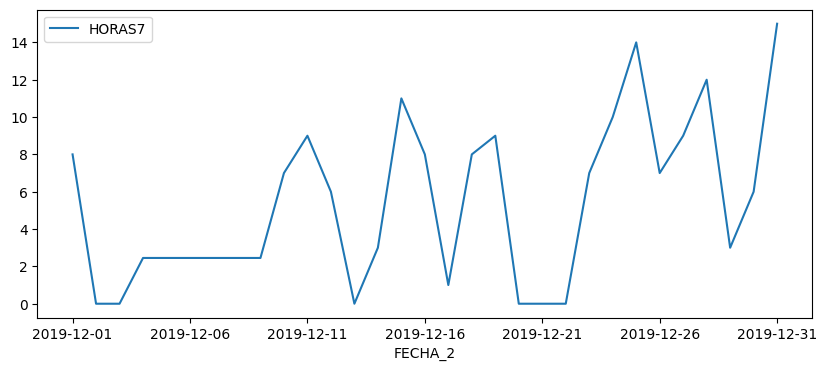

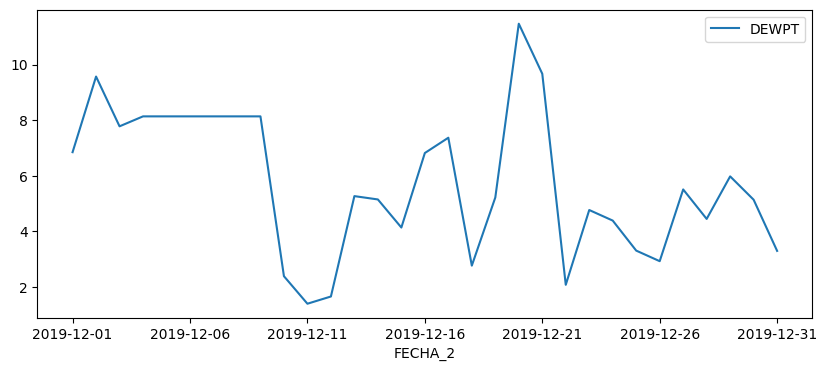

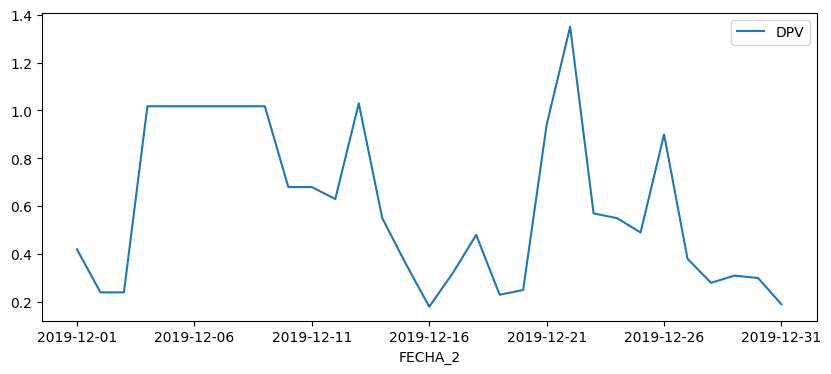

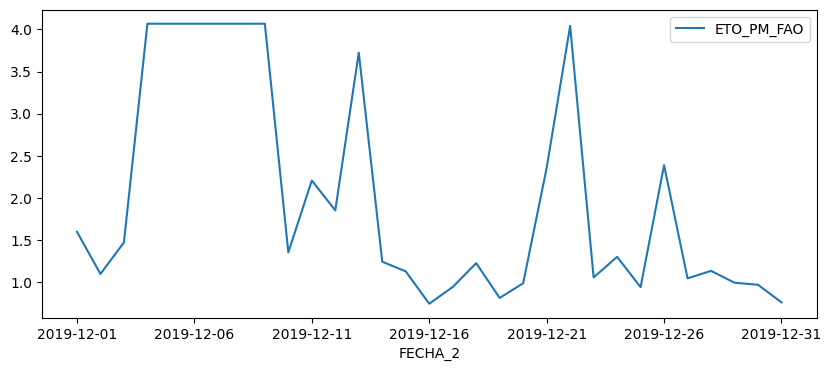

In [55]:
for variable in data_diciembre_2019.columns:
    if variable != 'FECHA_2' and variable != 'FECHA' and variable != 'CODEST' and variable != 'AÑO' and variable != 'ESTACION':
        data_diciembre_2019.plot(x='FECHA_2', y=variable, figsize=(10,4))
        plt.show()

## Datos imputados KNNImputer por columnas en Diciembre

Vemos que pasa igual que con el anterior

In [56]:
data_diciembre_2019 = datos_imputados_KNN[datos_imputados_KNN['FECHA_2'] >= '2019-12-01']
data_diciembre_2019 = data_diciembre_2019[data_diciembre_2019['FECHA_2'] <= '2019-12-31']

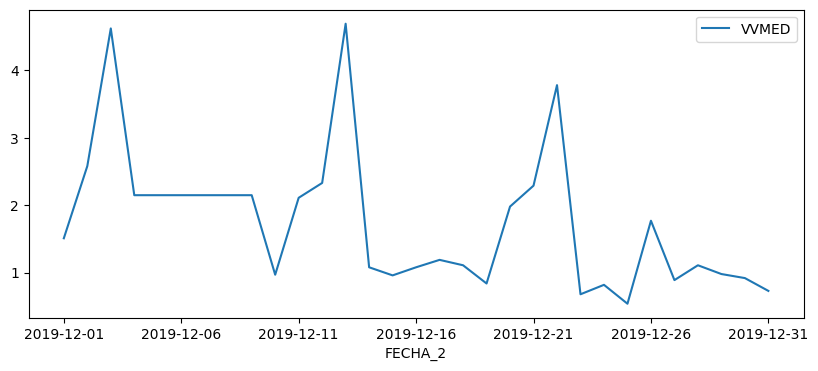

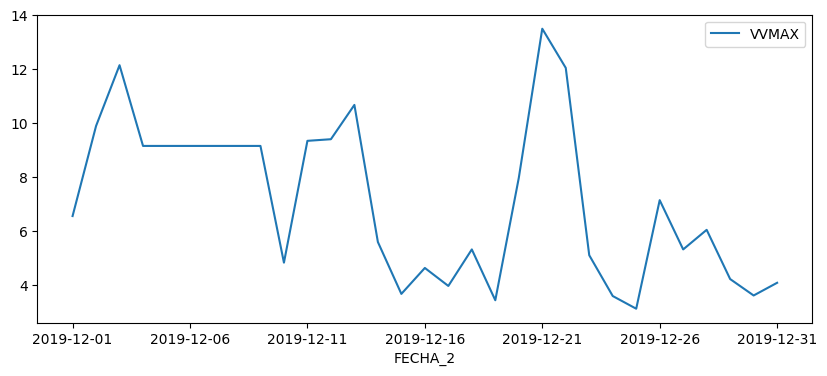

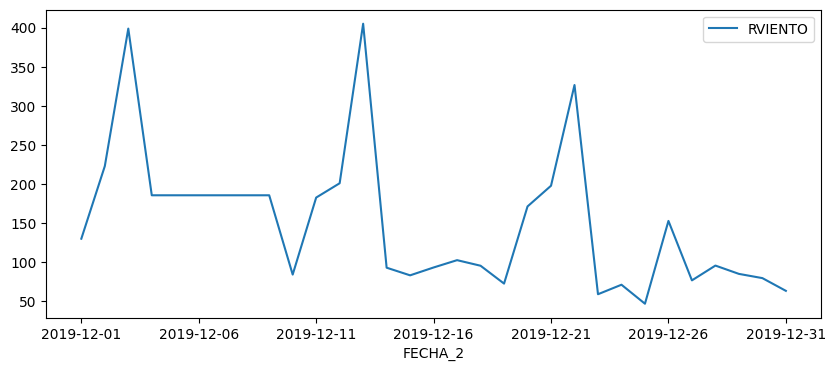

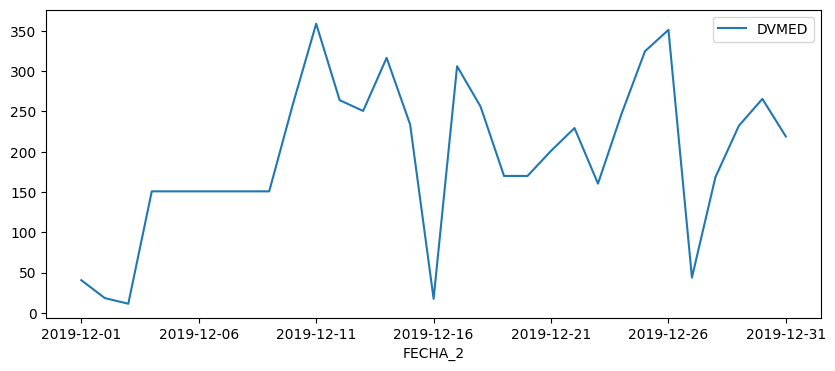

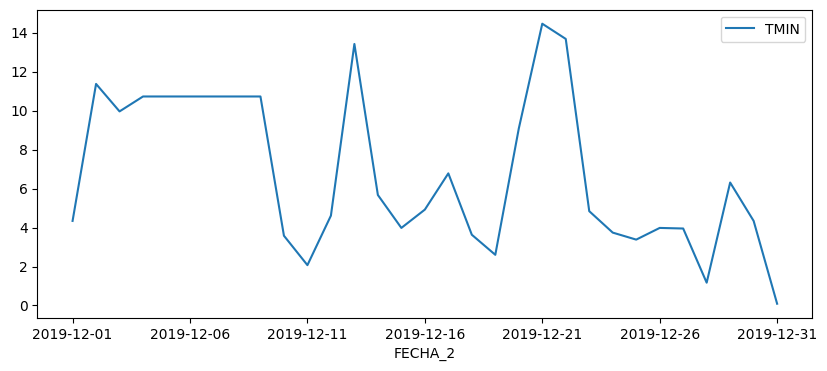

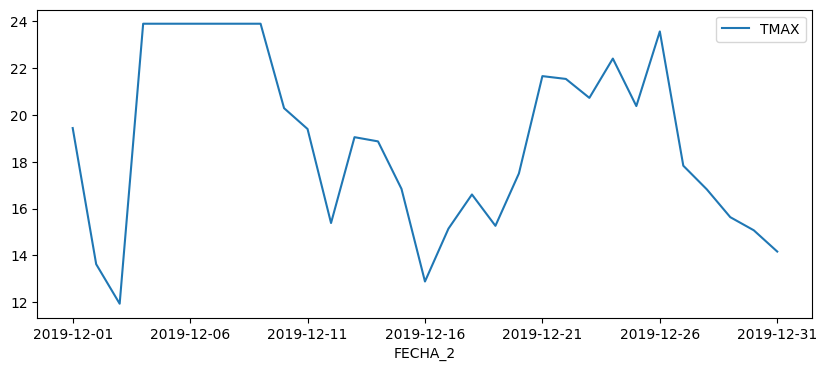

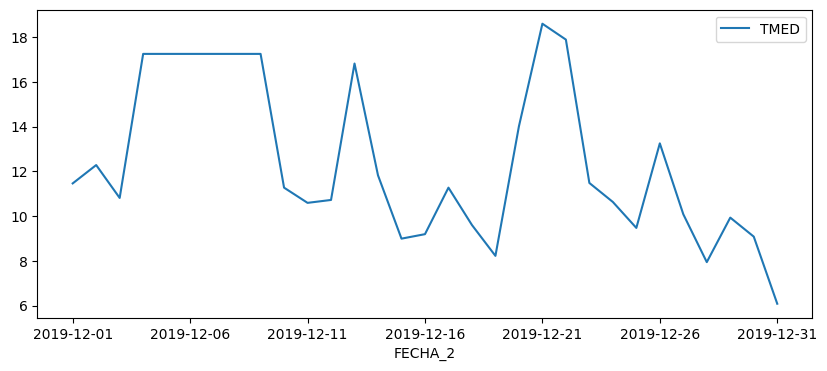

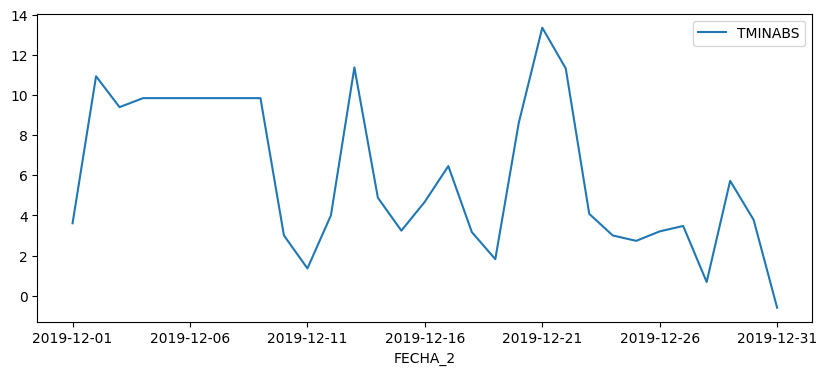

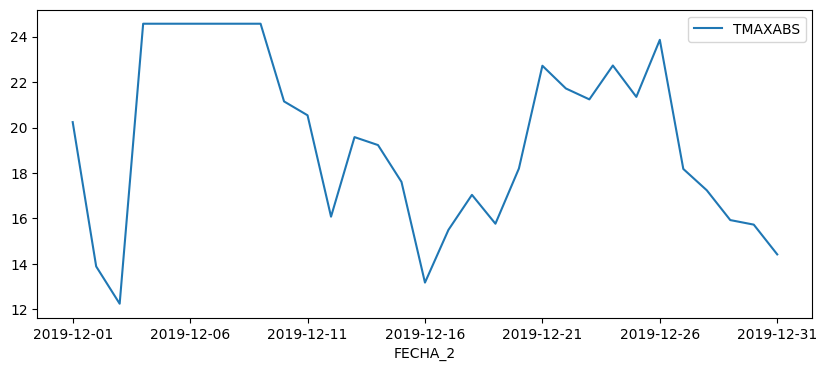

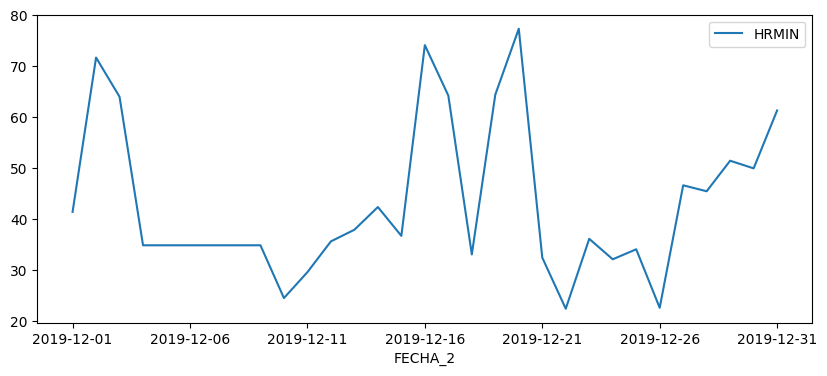

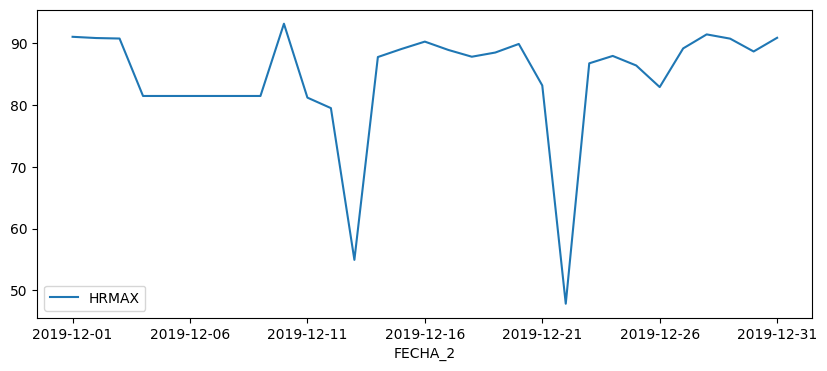

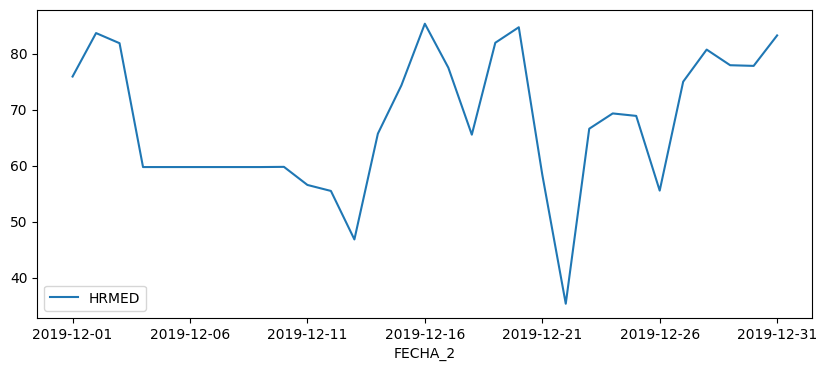

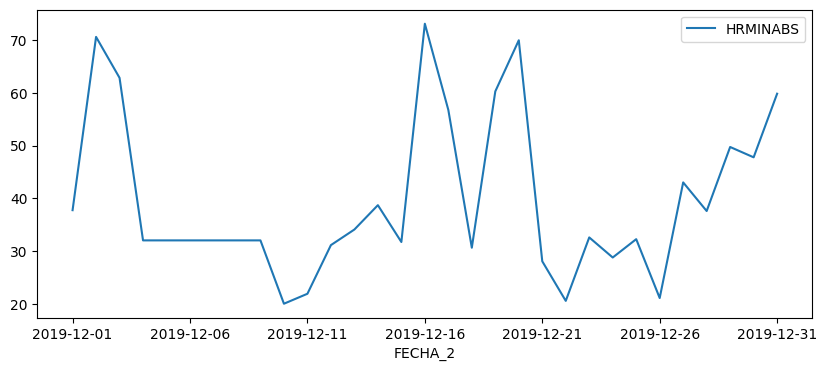

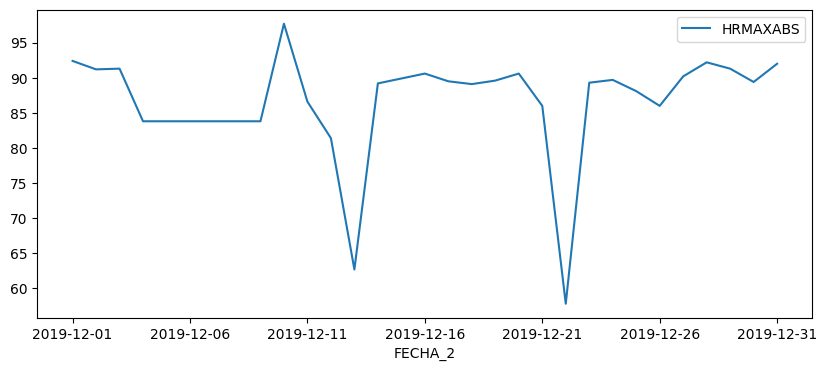

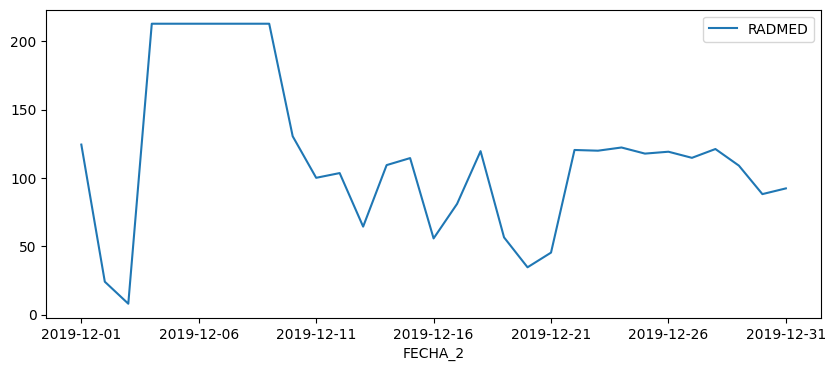

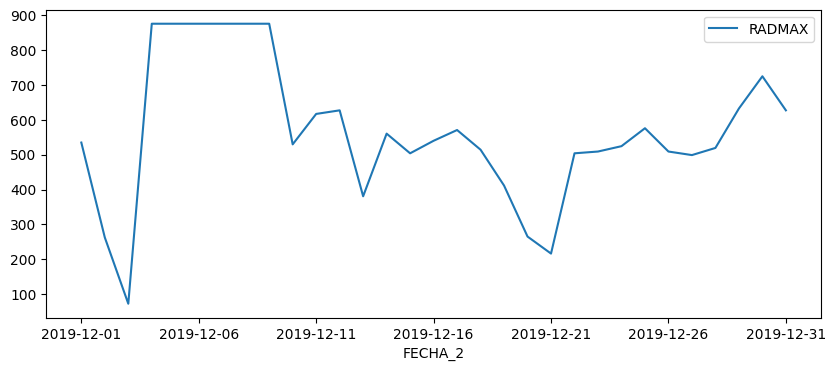

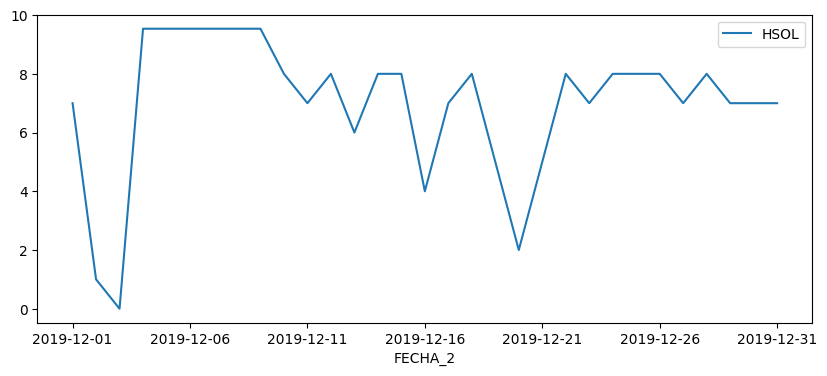

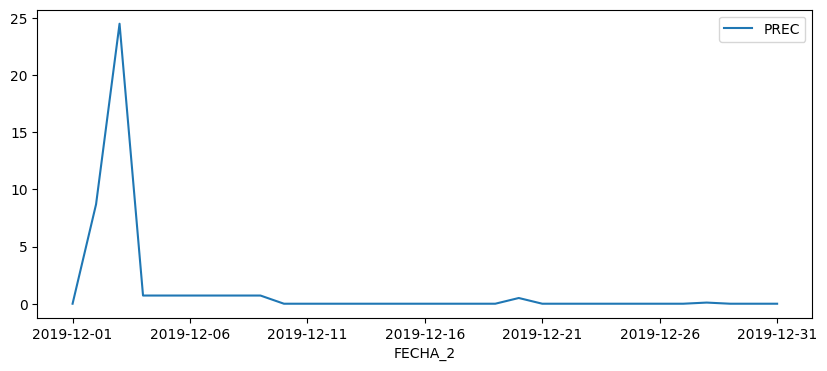

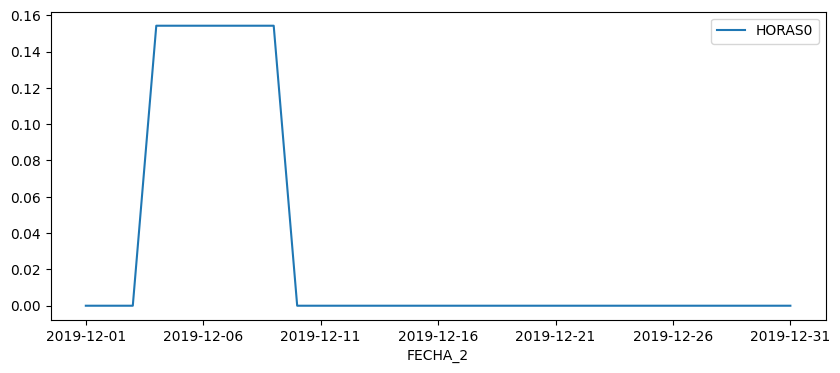

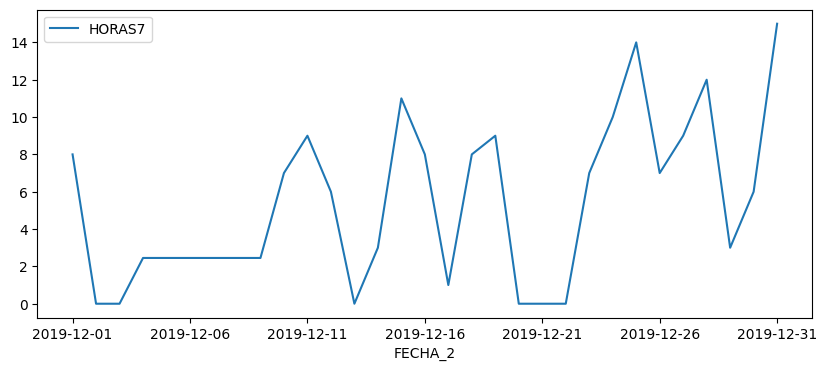

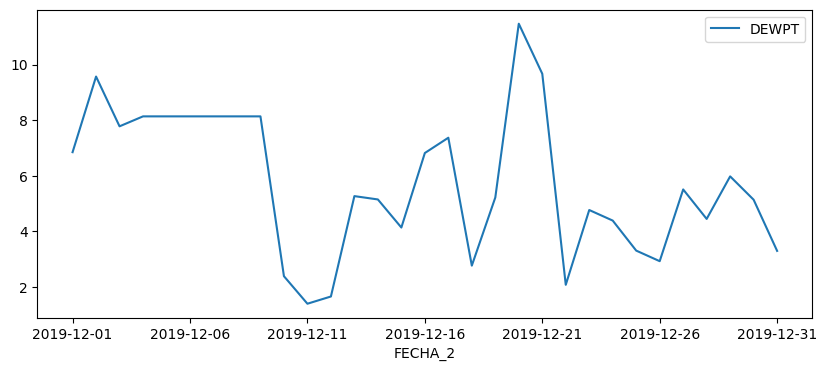

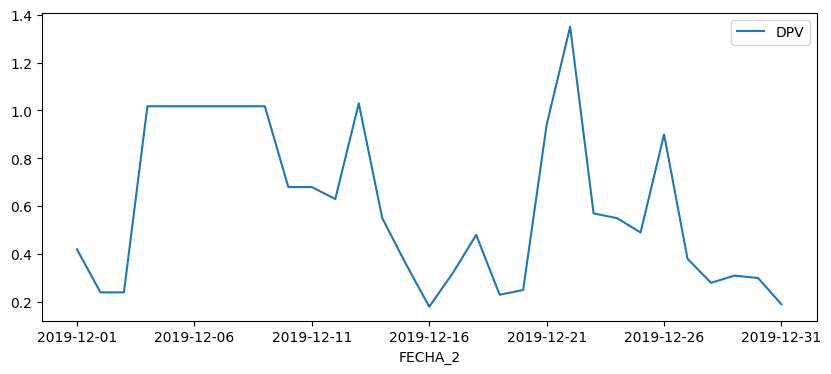

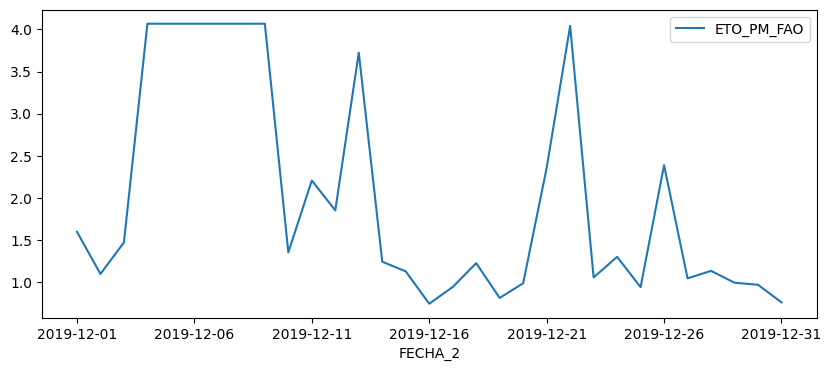

In [57]:
for variable in data_diciembre_2019.columns:
    if variable != 'FECHA_2' and variable != 'FECHA' and variable != 'CODEST' and variable != 'AÑO' and variable != 'ESTACION':
        data_diciembre_2019.plot(x='FECHA_2', y=variable, figsize=(10,4))
        plt.show()

## Datos imputados en Diciembre con KNNImputer indexando por fecha

In [58]:
data_diciembre_2019 = datos_indexados_fecha[datos_indexados_fecha['FECHA_2'] >= '2019-12-01']
data_diciembre_2019 = data_diciembre_2019[data_diciembre_2019['FECHA_2'] <= '2019-12-31']

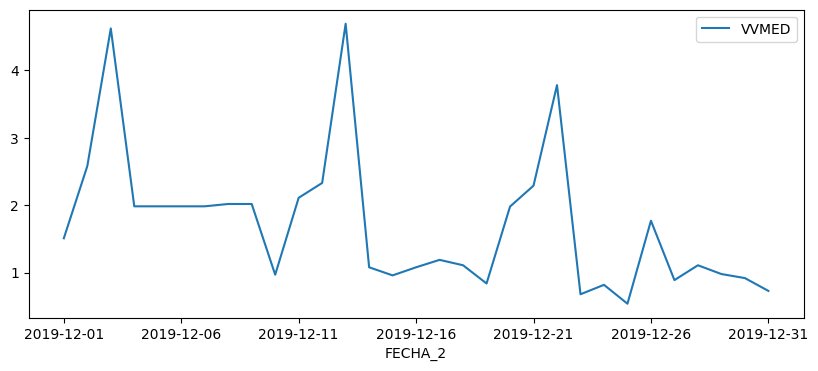

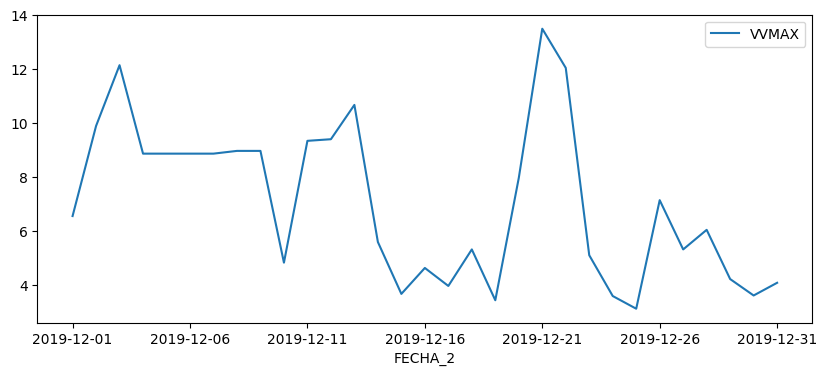

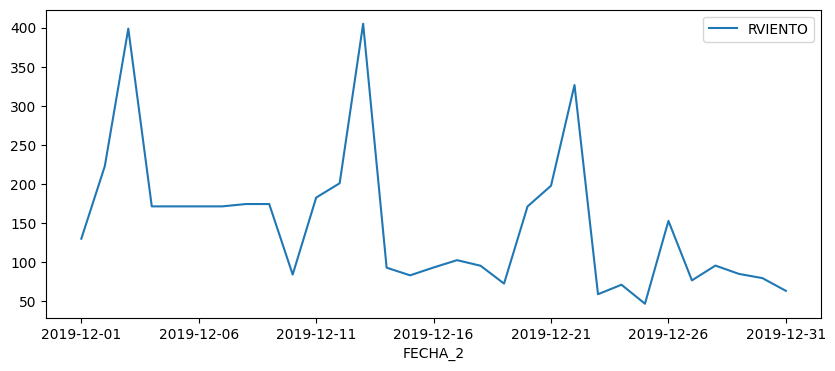

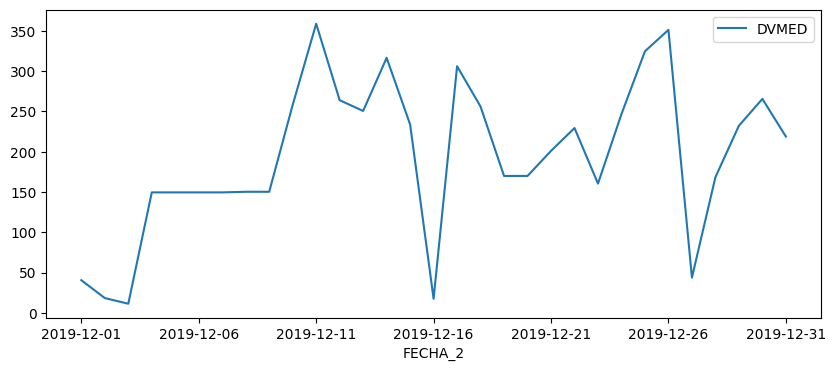

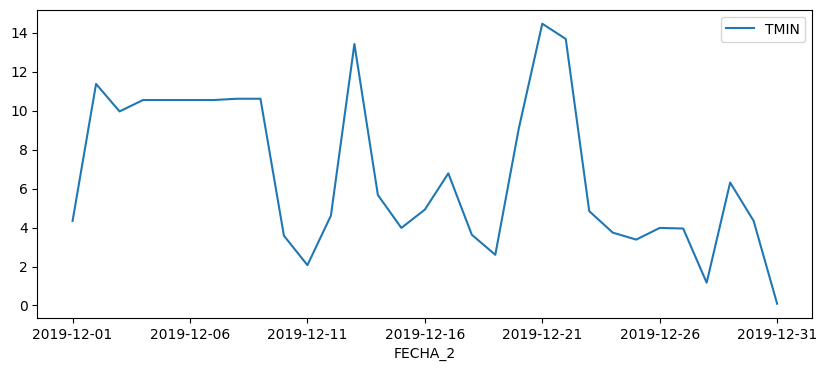

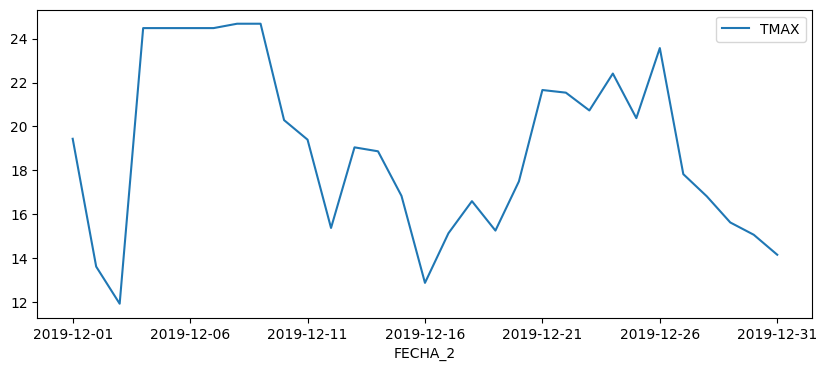

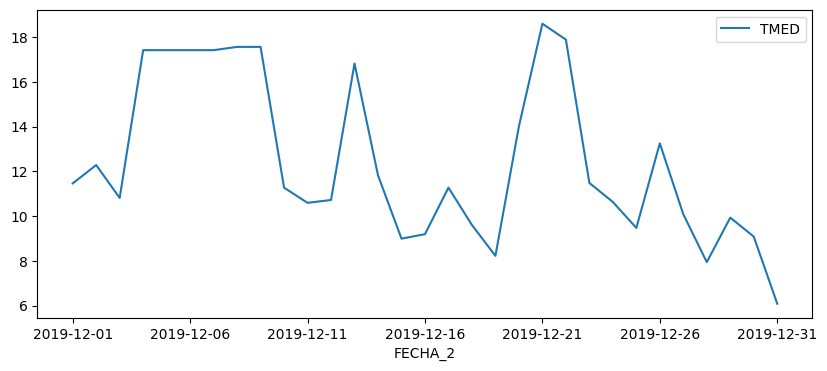

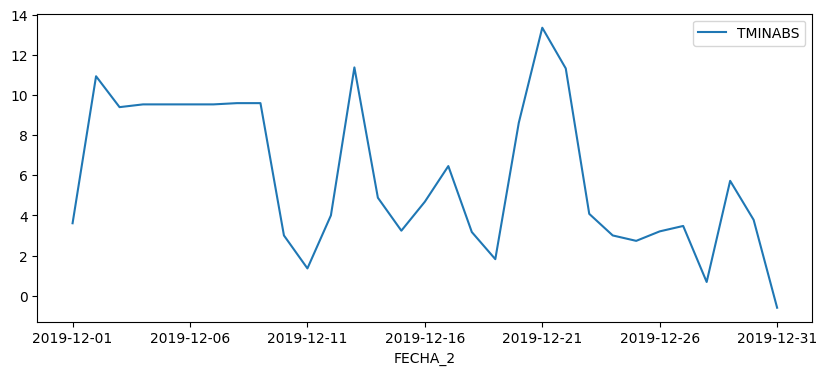

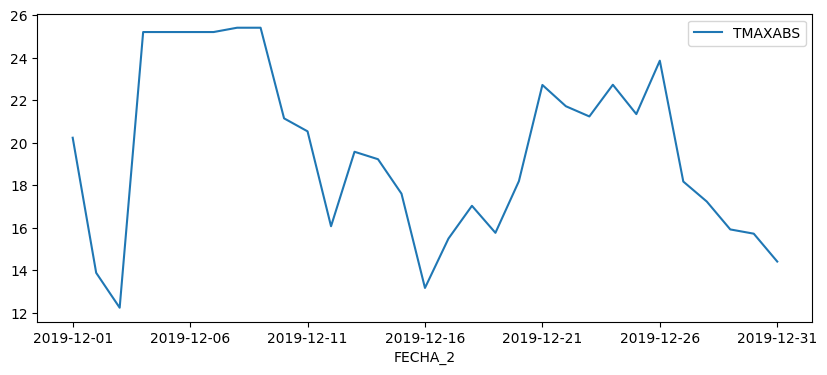

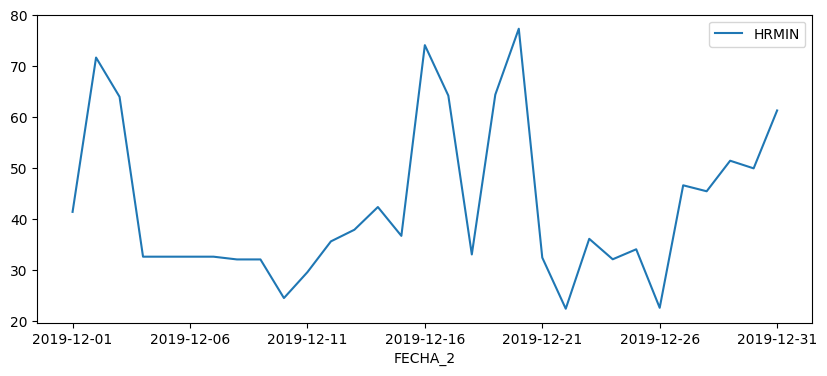

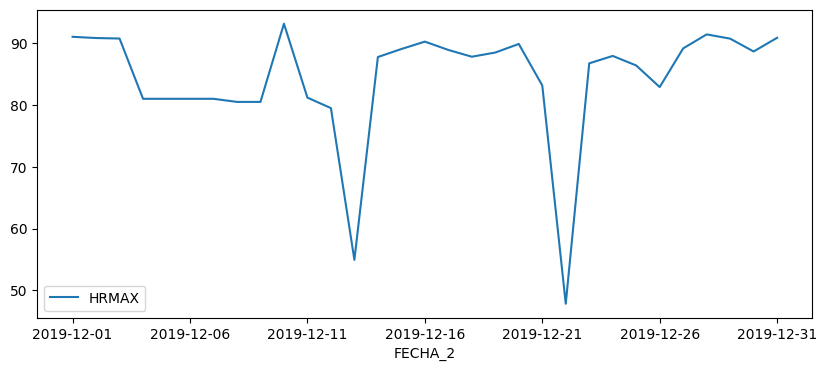

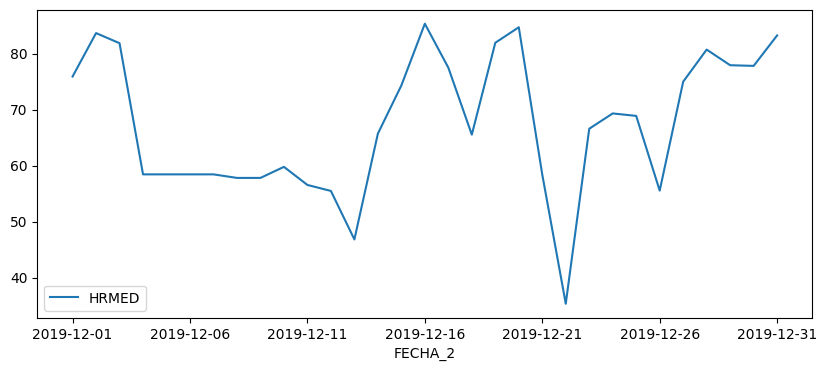

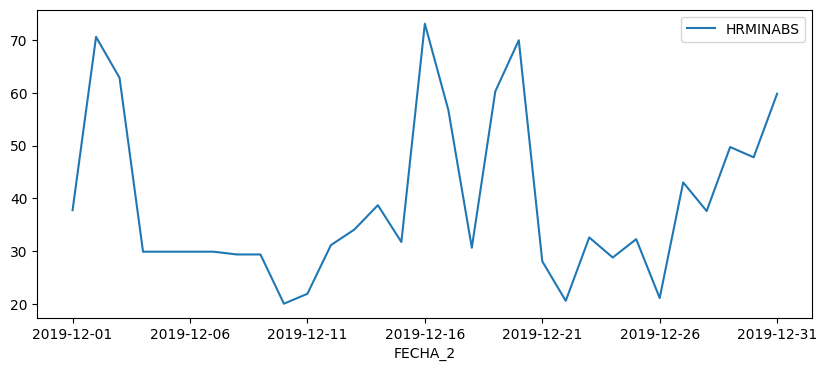

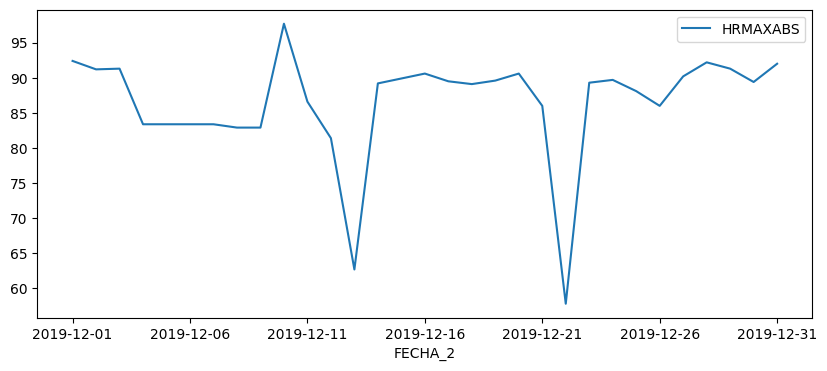

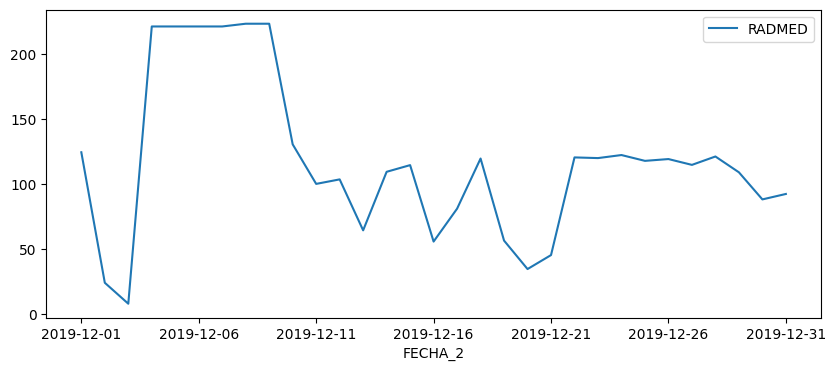

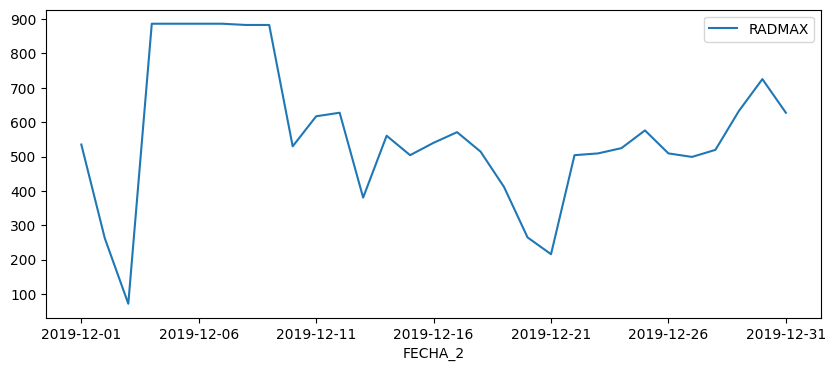

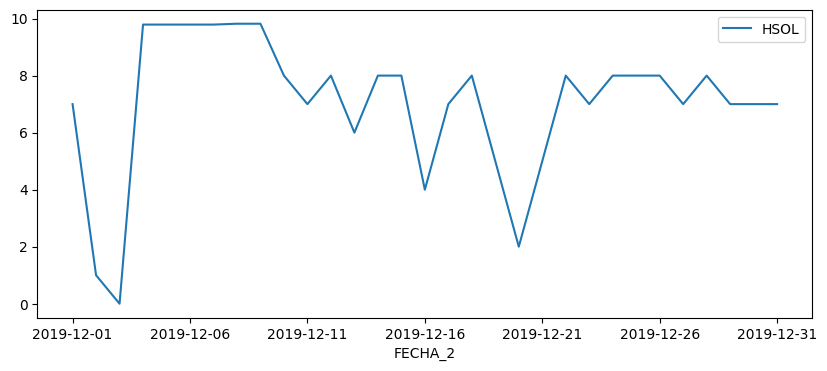

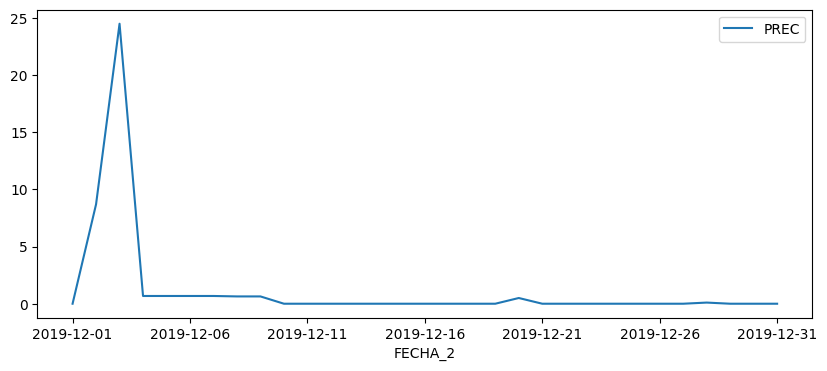

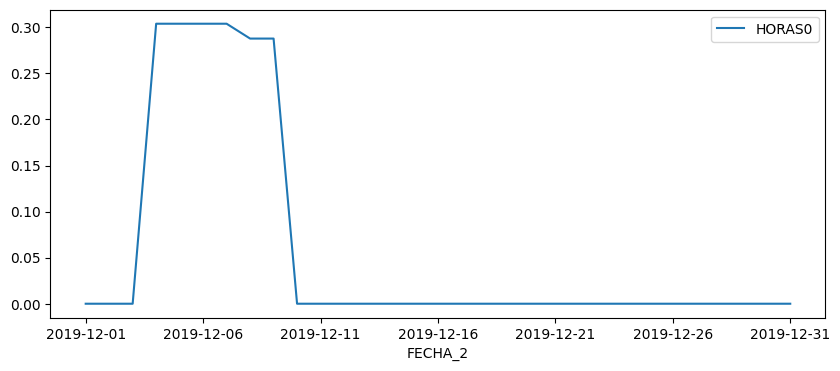

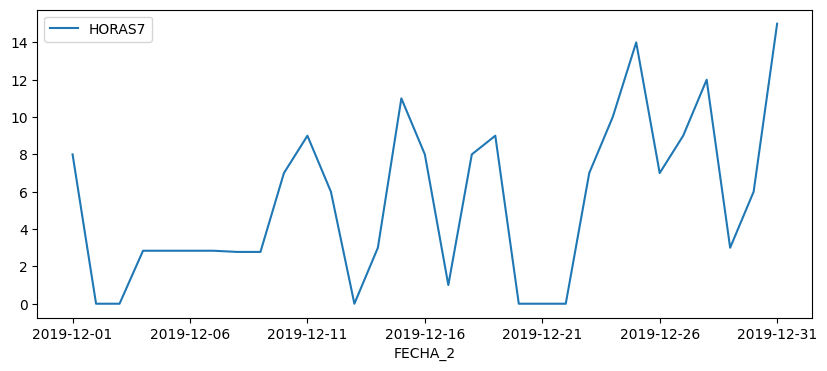

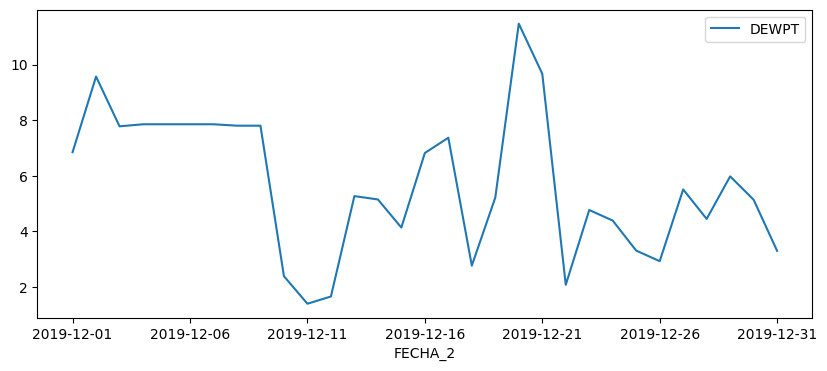

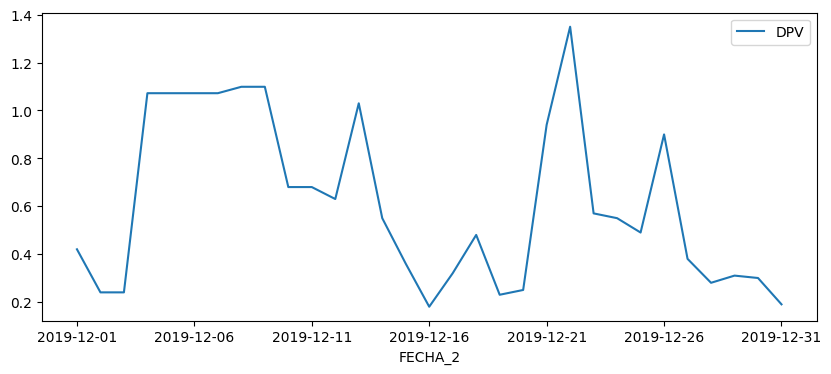

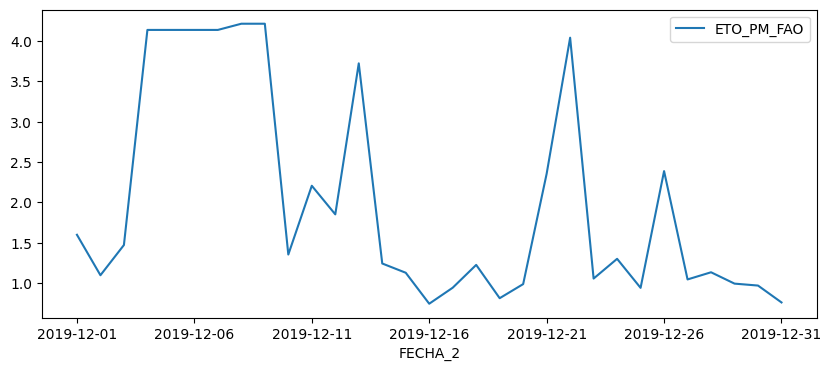

In [59]:
for variable in data_diciembre_2019.columns:
    if variable != 'FECHA_2' and variable != 'FECHA' and variable != 'CODEST' and variable != 'AÑO' and variable != 'ESTACION':
        data_diciembre_2019.plot(x='FECHA_2', y=variable, figsize=(10,4))
        plt.show()